In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(columns = ["EIN","NAME","STATUS","SPECIAL_CONSIDERATIONS"], inplace = True)


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
unique_app = application_df['APPLICATION_TYPE'].value_counts()

unique_app



T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

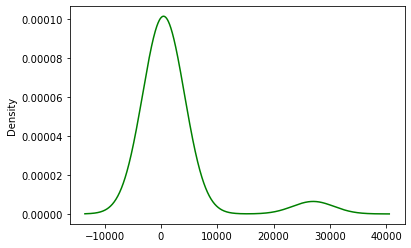

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
unique_app.plot.density(color='green')

In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(unique_app[unique_app < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
unique_class = application_df['CLASSIFICATION'].value_counts()
unique_class

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(unique_class[unique_class < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
#  YOUR CODE GOES HER
application_cat = ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT']

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()
encode_df.dtypes

C:\Users\shrut\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64


In [11]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
merged_df = pd.merge(application_df, encode_df, how='inner', left_index=True,
                  right_index=True).drop(columns = application_cat)
merged_df


ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  \
0          5000              1                     1.0                   0.0   
1        108590              1                     0.0                   0.0   
2          5000              0                     0.0                   0.0   
3          6692              1                     0.0                   0.0   
4        142590              1                     0.0                   0.0   
...         ...            ...                     ...                   ...   
34294      5000              0                     0.0                   0.0   
34295      5000              0                     0.0                   0.0   
34296      5000              0                     0.0                   0.0   
34297      5000              1                     0.0                   0.0   
34298  36500179              0                     0.0                   0.0   

       APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                      0.0                  0.0                  0.0   
1                      1.0                  0.0                  0.0   
2                      0.0                  0.0                  1.0   
3                      1.0                  0.0                  0.0   
4                      1.0                  0.0                  0.0   
...                    ...                  ...                  ...   
34294                  0.0                  1.0                  0.0   
34295                  0.0                  1.0                  0.0   
34296                  1.0                  0.0                  0.0   
34297                  0.0                  0.0                  1.0   
34298                  1.0                  0.0                  0.0   

       APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           1.0   
3                      0.0                           1.0   
4                      0.0                           0.0   
...                    ...                           ...   
34294                  0.0                           0.0   
34295                  0.0                           1.0   
34296                  0.0                           1.0   
34297                  0.0                           0.0   
34298                  0.0                           0.0   

       AFFILIATION_Family/Parent  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                            0.0  ...                 0.0           1.0   
1                            0.0  ...                 0.0           0.0   
2                            0.0  ...                 0.0           1.0   
3                            0.0  ...                 1.0           0.0   
4                            0.0  ...                 1.0           0.0   
...                          ...  ...                 ...           ...   
34294                        0.0  ...                 0.0           1.0   
34295                        0.0  ...                 0.0           1.0   
34296                        0.0  ...                 0.0           1.0   
34297                        0.0  ...                 0.0           1.0   
34298                        0.0  ...                 0.0           0.0   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294         

In [12]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = merged_df.drop(columns = ['IS_SUCCESSFUL'])
y = merged_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 152       
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
import os
os.makedirs("checkpoints1/", exist_ok=True)
checkpoint_path="checkpoints1/weights.{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1, save_weights_only=True, save_freq=5)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[checkpoint])

Epoch 1/100
  1/804 [..............................] - ETA: 5:10 - loss: 0.6837 - accuracy: 0.6562
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.7223 - accuracy: 0.5536  
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.7233 - accuracy: 0.5425
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.7170 - accuracy: 0.5594
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
 55/804 [=>............................] - 


Epoch 1: saving model to checkpoints1\weights.01.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6603 - accuracy: 0.6396
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6594 - accuracy: 0.6415
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6594 - accuracy: 0.6430
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6578 - accuracy: 0.6455
Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5

Epoch 1: saving model to checkpoints1\weights.01.hdf5
545/


Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6014 - accuracy: 0.7215
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.6016 - accuracy: 0.7211
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.6006 - accuracy: 0.7209
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5987 - accuracy: 0.7224
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epo


Epoch 2: saving model to checkpoints1\weights.02.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5906 - accuracy: 0.7232
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5909 - accuracy: 0.7229
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5907 - accuracy: 0.7229
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5905 - accuracy: 0.7230
Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epoch 2: saving model to checkpoints1\weights.02.hdf5

Epo


Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5786 - accuracy: 0.7273
Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5781 - accuracy: 0.7274
Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5774 - accuracy: 0.7279
Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epoch 3: saving model to checkpoints1\weights.03.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5783 - accuracy: 0.7268
Epoch 3: saving model to checkpoints1\weights.03.hdf5

Epo


Epoch 4: saving model to checkpoints1\weights.04.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5822 - accuracy: 0.7067
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5810 - accuracy: 0.7132
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5669 - accuracy: 0.7289
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7333
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epo

498/804 [=================>............] - ETA: 1s - loss: 0.5773 - accuracy: 0.7256
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5773 - accuracy: 0.7257
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.5777 - accuracy: 0.7256
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5774 - accuracy: 0.7264
Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5

Epoch 4: saving model to checkpoints1\weights.04.hdf5
558/


Epoch 5: saving model to checkpoints1\weights.05.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7196
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5761 - accuracy: 0.7242
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7270
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7282
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
234/


Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5749 - accuracy: 0.7255
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5759 - accuracy: 0.7245
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5759 - accuracy: 0.7245
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epoch 5: saving model to checkpoints1\weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5761 - accuracy: 0.7244
Epoch 5: saving model to checkpoints1\weights.05.hdf5

Epo

345/804 [===========>..................] - ETA: 1s - loss: 0.5682 - accuracy: 0.7318
Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5683 - accuracy: 0.7318
Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5701 - accuracy: 0.7301
Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5703 - accuracy: 0.7301
Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5

Epoch 6: saving model to checkpoints1\weights.06.hdf5
400/804 [=============>................] - ETA: 1s - loss: 


Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5792 - accuracy: 0.7188
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7154
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5735 - accuracy: 0.7152
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5781 - accuracy: 0.7142
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epo


Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5745 - accuracy: 0.7241
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5747 - accuracy: 0.7240
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5751 - accuracy: 0.7236
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epoch 7: saving model to checkpoints1\weights.07.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5757 - accuracy: 0.7229
Epoch 7: saving model to checkpoints1\weights.07.hdf5

Epo


Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5720 - accuracy: 0.7236
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5745 - accuracy: 0.7214
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5746 - accuracy: 0.7205
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7201
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epo


Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5738 - accuracy: 0.7237
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5743 - accuracy: 0.7233
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5734 - accuracy: 0.7241
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epoch 8: saving model to checkpoints1\weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5730 - accuracy: 0.7245
Epoch 8: saving model to checkpoints1\weights.08.hdf5

Epo


Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5768 - accuracy: 0.7198
Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5756 - accuracy: 0.7206
Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5754 - accuracy: 0.7207
Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epoch 9: saving model to checkpoints1\weights.09.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5746 - accuracy: 0.7217
Epoch 9: saving model to checkpoints1\weights.09.hdf5

Epo

 59/804 [=>............................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7373
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5585 - accuracy: 0.7365
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7363
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5581 - accuracy: 0.7356
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.

539/804 [===================>..........] - ETA: 1s - loss: 0.5674 - accuracy: 0.7277
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5680 - accuracy: 0.7274
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5678 - accuracy: 0.7277
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5680 - accuracy: 0.7275
Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.10.hdf5

Epoch 10: saving model to checkpoints1\weights.

210/804 [======>.......................] - ETA: 2s - loss: 0.5627 - accuracy: 0.7336
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7312
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7318
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7315
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.

695/804 [========================>.....] - ETA: 0s - loss: 0.5693 - accuracy: 0.7273
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5685 - accuracy: 0.7280
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5690 - accuracy: 0.7275
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5685 - accuracy: 0.7279
Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.11.hdf5

Epoch 11: saving model to checkpoints1\weights.

371/804 [============>.................] - ETA: 1s - loss: 0.5695 - accuracy: 0.7270
Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5702 - accuracy: 0.7258
Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5702 - accuracy: 0.7255
Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5698 - accuracy: 0.7257
Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.12.hdf5

Epoch 12: saving model to checkpoints1\weights.

 42/804 [>.............................] - ETA: 3s - loss: 0.5766 - accuracy: 0.7202
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5762 - accuracy: 0.7231
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.5717 - accuracy: 0.7261
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5684 - accuracy: 0.7277
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.

527/804 [==================>...........] - ETA: 1s - loss: 0.5671 - accuracy: 0.7284
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5673 - accuracy: 0.7283
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5673 - accuracy: 0.7283
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5676 - accuracy: 0.7277
Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.13.hdf5

Epoch 13: saving model to checkpoints1\weights.


Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5628 - accuracy: 0.7324
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7322
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5638 - accuracy: 0.7319
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5639 - accuracy: 0.7317
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.

683/804 [========================>.....] - ETA: 0s - loss: 0.5675 - accuracy: 0.7273
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5675 - accuracy: 0.7275
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5675 - accuracy: 0.7273
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5673 - accuracy: 0.7274
Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.14.hdf5

Epoch 14: saving model to checkpoints1\weights.

354/804 [============>.................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7317
Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5624 - accuracy: 0.7320
Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5613 - accuracy: 0.7331
Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5607 - accuracy: 0.7332
Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.15.hdf5

Epoch 15: saving model to checkpoints1\weights.

 29/804 [>.............................] - ETA: 3s - loss: 0.5720 - accuracy: 0.7231
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.5671 - accuracy: 0.7328
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7455
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7433
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.

510/804 [==================>...........] - ETA: 1s - loss: 0.5640 - accuracy: 0.7302
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5640 - accuracy: 0.7300
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5635 - accuracy: 0.7302
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5632 - accuracy: 0.7302
Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.16.hdf5

Epoch 16: saving model to checkpoints1\weights.

181/804 [=====>........................] - ETA: 2s - loss: 0.5736 - accuracy: 0.7206
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7208
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5708 - accuracy: 0.7232
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5712 - accuracy: 0.7239
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.


Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5652 - accuracy: 0.7286
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5658 - accuracy: 0.7281
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5659 - accuracy: 0.7279
Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5

Epoch 17: saving model to checkpoints1\weights.17.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5658 - accuracy: 0.7281
Epoch 17: saving model to checkpoints1\weights.

337/804 [===========>..................] - ETA: 1s - loss: 0.5650 - accuracy: 0.7295
Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5645 - accuracy: 0.7299
Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5650 - accuracy: 0.7297
Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5666 - accuracy: 0.7276
Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.18.hdf5

Epoch 18: saving model to checkpoints1\weights.

 13/804 [..............................] - ETA: 3s - loss: 0.6205 - accuracy: 0.6755
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6043 - accuracy: 0.6887
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5886 - accuracy: 0.7023
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.5794 - accuracy: 0.7134
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
 68/804 [=>............................] - ETA: 

493/804 [=================>............] - ETA: 1s - loss: 0.5648 - accuracy: 0.7278
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5653 - accuracy: 0.7274
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5661 - accuracy: 0.7268
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5662 - accuracy: 0.7266
Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.19.hdf5

Epoch 19: saving model to checkpoints1\weights.

164/804 [=====>........................] - ETA: 2s - loss: 0.5623 - accuracy: 0.7334
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7346
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5618 - accuracy: 0.7339
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5633 - accuracy: 0.7325
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.

639/804 [======================>.......] - ETA: 0s - loss: 0.5629 - accuracy: 0.7296
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5628 - accuracy: 0.7297
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5626 - accuracy: 0.7298
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5627 - accuracy: 0.7298
Epoch 20: saving model to checkpoints1\weights.20.hdf5

Epoch 20: saving model to checkpoints1\weights.20.hdf5
698/804 [=========================>....] - ETA: 

314/804 [==========>...................] - ETA: 1s - loss: 0.5639 - accuracy: 0.7282
Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.5640 - accuracy: 0.7276
Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5623 - accuracy: 0.7293
Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5626 - accuracy: 0.7294
Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.


Epoch 21: saving model to checkpoints1\weights.21.hdf5

Epoch 21: saving model to checkpoints1\weights.21.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5644 - accuracy: 0.7280
Epoch 22/100

Epoch 22: saving model to checkpoints1\weights.22.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.4517 - accuracy: 0.8438
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5633 - accuracy: 0.7266
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7258
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to che


Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5630 - accuracy: 0.7297
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5635 - accuracy: 0.7290
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5637 - accuracy: 0.7291
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.22.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5640 - accuracy: 0.7286
Epoch 22: saving model to checkpoints1\weights.22.hdf5

Epoch 22: saving model to checkpoints1\weights.

142/804 [====>.........................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7383
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5538 - accuracy: 0.7385
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5563 - accuracy: 0.7367
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7381
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.


Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5643 - accuracy: 0.7292
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5631 - accuracy: 0.7301
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5632 - accuracy: 0.7298
Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5

Epoch 23: saving model to checkpoints1\weights.23.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5628 - accuracy: 0.7301
Epoch 23: saving model to checkpoints1\weights.

293/804 [=========>....................] - ETA: 2s - loss: 0.5630 - accuracy: 0.7279
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5613 - accuracy: 0.7299
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7289
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5626 - accuracy: 0.7281
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
348/804 [===========>..................] - ETA: 

773/804 [===========================>..] - ETA: 0s - loss: 0.5638 - accuracy: 0.7279
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5641 - accuracy: 0.7276
Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5

Epoch 24: saving model to checkpoints1\weights.24.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5641 - accuracy: 0.7278
Epoch 25/100
  1/804 [..............................] - ETA: 1s - loss: 0.4294 - accuracy: 0.8438
Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5591 - accuracy: 0.7388
Epoch 25: saving model to checkpoints1\weights.25.hdf5

E

439/804 [===============>..............] - ETA: 1s - loss: 0.5581 - accuracy: 0.7318
Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5579 - accuracy: 0.7318
Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5586 - accuracy: 0.7314
Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5582 - accuracy: 0.7312
Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.25.hdf5

Epoch 25: saving model to checkpoints1\weights.


Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7266
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7248
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7240
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5640 - accuracy: 0.7220
Epoch 26: saving model to checkpoints1\weights.

600/804 [=====================>........] - ETA: 0s - loss: 0.5640 - accuracy: 0.7266
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5637 - accuracy: 0.7269
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5646 - accuracy: 0.7262
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5648 - accuracy: 0.7261
Epoch 26: saving model to checkpoints1\weights.26.hdf5

Epoch 26: saving model to checkpoints1\weights.26.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5647 - accuracy: 0.7262
Epoch 26: saving mo

268/804 [=========>....................] - ETA: 2s - loss: 0.5729 - accuracy: 0.7199
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5730 - accuracy: 0.7199
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7194
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5709 - accuracy: 0.7210
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5690 - accuracy: 0.7232
Epoch 27: saving mo


Epoch 27: saving model to checkpoints1\weights.27.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5636 - accuracy: 0.7284
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5640 - accuracy: 0.7280
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5633 - accuracy: 0.7285
Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5

Epoch 27: saving model to checkpoints1\weights.27.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5637 - accuracy: 0.7285
Epoch 27: saving model to checkpoints1\weights.27.hdf5
804/804 [==============================] - 3s 4m


Epoch 28: saving model to checkpoints1\weights.28.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5598 - accuracy: 0.7322
Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5603 - accuracy: 0.7314
Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5604 - accuracy: 0.7311
Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.28.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5607 - accuracy: 0.7307
Epoch 28: saving model to checkpoints1\weights.28.hdf5

Epoch 28: saving model to checkpoints1\weights.

 83/804 [==>...........................] - ETA: 3s - loss: 0.5550 - accuracy: 0.7308
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 0.5548 - accuracy: 0.7312
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.5556 - accuracy: 0.7317
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.5545 - accuracy: 0.7336
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.


Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5672 - accuracy: 0.7244
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5662 - accuracy: 0.7253
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5660 - accuracy: 0.7257
Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5

Epoch 29: saving model to checkpoints1\weights.29.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5654 - accuracy: 0.7265
Epoch 29: saving model to checkpoints1\weights.


Epoch 30: saving model to checkpoints1\weights.30.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7361
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7361
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7332
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7326
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.

714/804 [=========================>....] - ETA: 0s - loss: 0.5612 - accuracy: 0.7310
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5616 - accuracy: 0.7307
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5622 - accuracy: 0.7299
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5623 - accuracy: 0.7299
Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.30.hdf5

Epoch 30: saving model to checkpoints1\weights.


Epoch 31: saving model to checkpoints1\weights.31.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5600 - accuracy: 0.7311
Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5606 - accuracy: 0.7302
Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5608 - accuracy: 0.7298
Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.31.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5610 - accuracy: 0.7299
Epoch 31: saving model to checkpoints1\weights.31.hdf5

Epoch 31: saving model to checkpoints1\weights.


Epoch 32: saving model to checkpoints1\weights.32.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7500
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7453
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.5554 - accuracy: 0.7400
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.5553 - accuracy: 0.7383
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.


Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5620 - accuracy: 0.7277
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5621 - accuracy: 0.7279
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5619 - accuracy: 0.7282
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.32.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5617 - accuracy: 0.7286
Epoch 32: saving model to checkpoints1\weights.32.hdf5

Epoch 32: saving model to checkpoints1\weights.


Epoch 33: saving model to checkpoints1\weights.33.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7280
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5624 - accuracy: 0.7280
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5609 - accuracy: 0.7294
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5613 - accuracy: 0.7298
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
241/804 [=======>......................] - ETA: 

657/804 [=======================>......] - ETA: 0s - loss: 0.5616 - accuracy: 0.7294
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5617 - accuracy: 0.7290
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5618 - accuracy: 0.7287
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7295
Epoch 33: saving model to checkpoints1\weights.33.hdf5

Epoch 33: saving model to checkpoints1\weights.33.hdf5
716/804 [=========================>....] - ETA: 

313/804 [==========>...................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7325
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5588 - accuracy: 0.7315
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5592 - accuracy: 0.7308
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5597 - accuracy: 0.7297
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.

783/804 [============================>.] - ETA: 0s - loss: 0.5629 - accuracy: 0.7270
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5629 - accuracy: 0.7270
Epoch 34: saving model to checkpoints1\weights.34.hdf5

Epoch 34: saving model to checkpoints1\weights.34.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5625 - accuracy: 0.7274
Epoch 35/100
  1/804 [..............................] - ETA: 1s - loss: 0.5973 - accuracy: 0.7812
Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5652 - accuracy: 0.7344
Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
 2


Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5662 - accuracy: 0.7256
Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5661 - accuracy: 0.7255
Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5655 - accuracy: 0.7262
Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5

Epoch 35: saving model to checkpoints1\weights.35.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5654 - accuracy: 0.7261
Epoch 35: saving model to checkpoints1\weights.


Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5742 - accuracy: 0.7163
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7180
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7212
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5682 - accuracy: 0.7226
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.

575/804 [====================>.........] - ETA: 0s - loss: 0.5615 - accuracy: 0.7286
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5611 - accuracy: 0.7293
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5612 - accuracy: 0.7290
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5608 - accuracy: 0.7293
Epoch 36: saving model to checkpoints1\weights.36.hdf5

Epoch 36: saving model to checkpoints1\weights.36.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5608 - accuracy: 0.7294
Epoch 36: saving mo


Epoch 37: saving model to checkpoints1\weights.37.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.5660 - accuracy: 0.7252
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5666 - accuracy: 0.7248
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5659 - accuracy: 0.7255
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.5643 - accuracy: 0.7269
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7260
Epoch 37: saving mo


Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5621 - accuracy: 0.7278
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5621 - accuracy: 0.7278
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5625 - accuracy: 0.7277
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.37.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5627 - accuracy: 0.7276
Epoch 37: saving model to checkpoints1\weights.37.hdf5

Epoch 37: saving model to checkpoints1\weights.

365/804 [============>.................] - ETA: 1s - loss: 0.5611 - accuracy: 0.7295
Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5621 - accuracy: 0.7284
Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5631 - accuracy: 0.7274
Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5630 - accuracy: 0.7274
Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.38.hdf5

Epoch 38: saving model to checkpoints1\weights.


Epoch 39: saving model to checkpoints1\weights.39.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5641 - accuracy: 0.7250
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5673 - accuracy: 0.7229
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7316
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5595 - accuracy: 0.7282
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.


Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7287
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5618 - accuracy: 0.7287
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5616 - accuracy: 0.7289
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5619 - accuracy: 0.7289
Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.39.hdf5

Epoch 39: saving model to checkpoints1\weights.

134/804 [====>.........................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7386
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7375
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7349
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7355
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5562 - accuracy: 0.7352
Epoch 40: saving mo


Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5606 - accuracy: 0.7302
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5606 - accuracy: 0.7299
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5600 - accuracy: 0.7302
Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5

Epoch 40: saving model to checkpoints1\weights.40.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5601 - accuracy: 0.7302
Epoch 40: saving model to checkpoints1\weights.

253/804 [========>.....................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7269
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5605 - accuracy: 0.7289
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5588 - accuracy: 0.7311
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5598 - accuracy: 0.7305
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5583 - accuracy: 0.7317
Epoch 41: saving mo

715/804 [=========================>....] - ETA: 0s - loss: 0.5627 - accuracy: 0.7276
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5630 - accuracy: 0.7276
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5626 - accuracy: 0.7278
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5625 - accuracy: 0.7275
Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.41.hdf5

Epoch 41: saving model to checkpoints1\weights.


Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5650 - accuracy: 0.7260
Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5652 - accuracy: 0.7255
Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5665 - accuracy: 0.7242
Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.42.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5662 - accuracy: 0.7247
Epoch 42: saving model to checkpoints1\weights.42.hdf5

Epoch 42: saving model to checkpoints1\weights.


Epoch 43: saving model to checkpoints1\weights.43.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.5746 - accuracy: 0.7195
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
 52/804 [>.............................] - ETA: 4s - loss: 0.5722 - accuracy: 0.7212
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
 62/804 [=>............................] - ETA: 4s - loss: 0.5703 - accuracy: 0.7238
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 0.5688 - accuracy: 0.7283
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
 82/804 [==>...........................] - ETA: 4s - loss: 0.5699 - accuracy: 0.7260
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving mo


Epoch 43: saving model to checkpoints1\weights.43.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5605 - accuracy: 0.7301
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5596 - accuracy: 0.7307
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.5594 - accuracy: 0.7313
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.43.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5598 - accuracy: 0.7309
Epoch 43: saving model to checkpoints1\weights.43.hdf5

Epoch 43: saving model to checkpoints1\weights.


Epoch 44: saving model to checkpoints1\weights.44.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.5477 - accuracy: 0.7397
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5519 - accuracy: 0.7367
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7365
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.5541 - accuracy: 0.7350
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5545 - accuracy: 0.7340
Epoch 44: saving mo


Epoch 44: saving model to checkpoints1\weights.44.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5601 - accuracy: 0.7294
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5608 - accuracy: 0.7285
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5612 - accuracy: 0.7284
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.5610 - accuracy: 0.7288
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving model to checkpoints1\weights.44.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5610 - accuracy: 0.7287
Epoch 44: saving model to checkpoints1\weights.44.hdf5

Epoch 44: saving mo

194/804 [======>.......................] - ETA: 2s - loss: 0.5666 - accuracy: 0.7254
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5676 - accuracy: 0.7239
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5664 - accuracy: 0.7255
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5679 - accuracy: 0.7244
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
249/804 [========>.....................] - ETA: 

632/804 [======================>.......] - ETA: 0s - loss: 0.5631 - accuracy: 0.7272
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5630 - accuracy: 0.7270
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5633 - accuracy: 0.7265
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5631 - accuracy: 0.7268
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving model to checkpoints1\weights.45.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5633 - accuracy: 0.7265
Epoch 45: saving model to checkpoints1\weights.45.hdf5

Epoch 45: saving mo

270/804 [=========>....................] - ETA: 2s - loss: 0.5615 - accuracy: 0.7284
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.5633 - accuracy: 0.7270
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.5627 - accuracy: 0.7273
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7267
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
325/804 [===========>..................] - ETA: 

727/804 [==========================>...] - ETA: 0s - loss: 0.5593 - accuracy: 0.7302
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5597 - accuracy: 0.7300
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5597 - accuracy: 0.7299
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5601 - accuracy: 0.7294
Epoch 46: saving model to checkpoints1\weights.46.hdf5

Epoch 46: saving model to checkpoints1\weights.46.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5604 - accuracy: 0.7290
Epoch 46: saving mo


Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5581 - accuracy: 0.7325
Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5594 - accuracy: 0.7310
Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5611 - accuracy: 0.7292
Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5

Epoch 47: saving model to checkpoints1\weights.47.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5618 - accuracy: 0.7287
Epoch 47: saving model to checkpoints1\weights.


Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5587 - accuracy: 0.7240
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7297
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7305
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7338
Epoch 48: saving model to checkpoints1\weights.


Epoch 48: saving model to checkpoints1\weights.48.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5611 - accuracy: 0.7291
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5607 - accuracy: 0.7295
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5608 - accuracy: 0.7291
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5613 - accuracy: 0.7285
Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5

Epoch 48: saving model to checkpoints1\weights.48.hdf5
567/804 [====================>.........] - ETA: 


Epoch 49: saving model to checkpoints1\weights.49.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5619 - accuracy: 0.7293
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5610 - accuracy: 0.7303
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5617 - accuracy: 0.7295
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5645 - accuracy: 0.7268
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7280
Epoch 49: saving mo


Epoch 49: saving model to checkpoints1\weights.49.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5585 - accuracy: 0.7321
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5589 - accuracy: 0.7316
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5596 - accuracy: 0.7306
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.49.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5596 - accuracy: 0.7305
Epoch 49: saving model to checkpoints1\weights.49.hdf5

Epoch 49: saving model to checkpoints1\weights.

284/804 [=========>....................] - ETA: 2s - loss: 0.5682 - accuracy: 0.7219
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5683 - accuracy: 0.7212
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5677 - accuracy: 0.7214
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7222
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.

759/804 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7281
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5610 - accuracy: 0.7290
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.7298
Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5

Epoch 50: saving model to checkpoints1\weights.50.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5609 - accuracy: 0.7293
Epoch 51/100
  1/804 [..............................] - ETA: 3s - loss: 0.6952 - accuracy: 0.6562
Epoch 51: saving model to checkpoints1\weights.51.hdf5

E


Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5615 - accuracy: 0.7284
Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5608 - accuracy: 0.7288
Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7283
Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5

Epoch 51: saving model to checkpoints1\weights.51.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5615 - accuracy: 0.7282
Epoch 51: saving model to checkpoints1\weights.


Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5570 - accuracy: 0.7287
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5603 - accuracy: 0.7258
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5565 - accuracy: 0.7311
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5538 - accuracy: 0.7347
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.

551/804 [===================>..........] - ETA: 1s - loss: 0.5606 - accuracy: 0.7295
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5608 - accuracy: 0.7292
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5608 - accuracy: 0.7292
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5606 - accuracy: 0.7293
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving model to checkpoints1\weights.52.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5606 - accuracy: 0.7293
Epoch 52: saving model to checkpoints1\weights.52.hdf5

Epoch 52: saving mo


Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7321
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7346
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7343
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7332
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.


Epoch 53: saving model to checkpoints1\weights.53.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5607 - accuracy: 0.7283
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7278
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5616 - accuracy: 0.7277
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5613 - accuracy: 0.7279
Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5

Epoch 53: saving model to checkpoints1\weights.53.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5615 - accuracy: 0.7277
Epoch 53: saving mo

328/804 [===========>..................] - ETA: 1s - loss: 0.5571 - accuracy: 0.7307
Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5577 - accuracy: 0.7302
Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5590 - accuracy: 0.7292
Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5594 - accuracy: 0.7286
Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.54.hdf5

Epoch 54: saving model to checkpoints1\weights.

Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7500
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7388
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7326
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7428
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.5535 - accuracy: 0.7381
Epoch 

454/804 [===============>..............] - ETA: 1s - loss: 0.5587 - accuracy: 0.7317
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5603 - accuracy: 0.7298
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5590 - accuracy: 0.7310
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5596 - accuracy: 0.7306
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving model to checkpoints1\weights.55.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5593 - accuracy: 0.7310
Epoch 55: saving model to checkpoints1\weights.55.hdf5

Epoch 55: saving mo

110/804 [===>..........................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7270
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7251
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5601 - accuracy: 0.7264
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7281
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5620 - accuracy: 0.7256
Epoch 56: saving mo

582/804 [====================>.........] - ETA: 0s - loss: 0.5576 - accuracy: 0.7320
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5580 - accuracy: 0.7317
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5580 - accuracy: 0.7319
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5569 - accuracy: 0.7327
Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5

Epoch 56: saving model to checkpoints1\weights.56.hdf5
635/804 [======================>.......] - ETA: 


Epoch 57: saving model to checkpoints1\weights.57.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7262
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7271
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7261
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7262
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.

716/804 [=========================>....] - ETA: 0s - loss: 0.5605 - accuracy: 0.7291
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5605 - accuracy: 0.7289
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5603 - accuracy: 0.7290
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5604 - accuracy: 0.7289
Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.57.hdf5

Epoch 57: saving model to checkpoints1\weights.


Epoch 58: saving model to checkpoints1\weights.58.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5613 - accuracy: 0.7305
Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5617 - accuracy: 0.7304
Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5618 - accuracy: 0.7302
Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.58.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5618 - accuracy: 0.7297
Epoch 58: saving model to checkpoints1\weights.58.hdf5

Epoch 58: saving model to checkpoints1\weights.


Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.5659 - accuracy: 0.7289
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.5705 - accuracy: 0.7269
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 0.5688 - accuracy: 0.7268
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5649 - accuracy: 0.7286
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.

538/804 [===================>..........] - ETA: 1s - loss: 0.5613 - accuracy: 0.7273
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5612 - accuracy: 0.7274
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5616 - accuracy: 0.7269
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5612 - accuracy: 0.7273
Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5

Epoch 59: saving model to checkpoints1\weights.59.hdf5
593/804 [=====================>........] - ETA: 

189/804 [======>.......................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7310
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5565 - accuracy: 0.7307
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5562 - accuracy: 0.7312
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7301
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.

659/804 [=======================>......] - ETA: 0s - loss: 0.5591 - accuracy: 0.7290
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5593 - accuracy: 0.7287
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5590 - accuracy: 0.7290
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5593 - accuracy: 0.7289
Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5

Epoch 60: saving model to checkpoints1\weights.60.hdf5
714/804 [=========================>....] - ETA: 

315/804 [==========>...................] - ETA: 2s - loss: 0.5546 - accuracy: 0.7323
Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5538 - accuracy: 0.7330
Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5539 - accuracy: 0.7332
Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5535 - accuracy: 0.7328
Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.61.hdf5

Epoch 61: saving model to checkpoints1\weights.


Epoch 61: saving model to checkpoints1\weights.61.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5603 - accuracy: 0.7285
Epoch 62/100

Epoch 62: saving model to checkpoints1\weights.62.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.5441 - accuracy: 0.7500
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5862 - accuracy: 0.6973
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5546 - accuracy: 0.7258
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
 46/804 [>....................

475/804 [================>.............] - ETA: 1s - loss: 0.5649 - accuracy: 0.7258
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5647 - accuracy: 0.7262
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5646 - accuracy: 0.7260
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5632 - accuracy: 0.7276
Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.62.hdf5

Epoch 62: saving model to checkpoints1\weights.


Epoch 63: saving model to checkpoints1\weights.63.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5615 - accuracy: 0.7284
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7313
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7331
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7338
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.


Epoch 63: saving model to checkpoints1\weights.63.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5619 - accuracy: 0.7280
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5623 - accuracy: 0.7276
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5622 - accuracy: 0.7278
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.63.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5619 - accuracy: 0.7278
Epoch 63: saving model to checkpoints1\weights.63.hdf5

Epoch 63: saving model to checkpoints1\weights.


Epoch 64: saving model to checkpoints1\weights.64.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7245
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7236
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7234
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5618 - accuracy: 0.7248
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.

763/804 [===========================>..] - ETA: 0s - loss: 0.5594 - accuracy: 0.7294
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5598 - accuracy: 0.7291
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5601 - accuracy: 0.7288
Epoch 64: saving model to checkpoints1\weights.64.hdf5

Epoch 64: saving model to checkpoints1\weights.64.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5601 - accuracy: 0.7286
Epoch 65/100
  1/804 [..............................] - ETA: 1s - loss: 0.4458 - accuracy: 0.8125
Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5

E

419/804 [==============>...............] - ETA: 1s - loss: 0.5599 - accuracy: 0.7299
Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5595 - accuracy: 0.7303
Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5591 - accuracy: 0.7307
Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5589 - accuracy: 0.7305
Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.65.hdf5

Epoch 65: saving model to checkpoints1\weights.

 90/804 [==>...........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7427
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7375
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5509 - accuracy: 0.7393
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7403
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
149/804 [====>.........................] - ETA: 

565/804 [====================>.........] - ETA: 0s - loss: 0.5571 - accuracy: 0.7340
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5581 - accuracy: 0.7331
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5581 - accuracy: 0.7331
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5581 - accuracy: 0.7331
Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5

Epoch 66: saving model to checkpoints1\weights.66.hdf5
620/804 [======================>.......] - ETA: 

216/804 [=======>......................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7300
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5573 - accuracy: 0.7300
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.5587 - accuracy: 0.7293
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7292
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.


Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5600 - accuracy: 0.7285
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5601 - accuracy: 0.7286
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5603 - accuracy: 0.7284
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.67.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5595 - accuracy: 0.7290
Epoch 67: saving model to checkpoints1\weights.67.hdf5

Epoch 67: saving model to checkpoints1\weights.

352/804 [============>.................] - ETA: 1s - loss: 0.5609 - accuracy: 0.7299
Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5597 - accuracy: 0.7306
Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5593 - accuracy: 0.7306
Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5596 - accuracy: 0.7308
Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.68.hdf5

Epoch 68: saving model to checkpoints1\weights.

 13/804 [..............................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7332
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5625 - accuracy: 0.7243
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5530 - accuracy: 0.7340
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7419
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.


Epoch 69: saving model to checkpoints1\weights.69.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5594 - accuracy: 0.7279
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5582 - accuracy: 0.7290
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5583 - accuracy: 0.7287
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5589 - accuracy: 0.7290
Epoch 69: saving model to checkpoints1\weights.69.hdf5

Epoch 69: saving model to checkpoints1\weights.69.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5584 - accuracy: 0.7293
Epoch 69: saving mo

134/804 [====>.........................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7295
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5597 - accuracy: 0.7298
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7286
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5581 - accuracy: 0.7320
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
189/804 [======>.......................] - ETA: 

604/804 [=====================>........] - ETA: 0s - loss: 0.5594 - accuracy: 0.7294
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5593 - accuracy: 0.7293
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5599 - accuracy: 0.7289
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5602 - accuracy: 0.7281
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving model to checkpoints1\weights.70.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7277
Epoch 70: saving model to checkpoints1\weights.70.hdf5

Epoch 70: saving mo

260/804 [========>.....................] - ETA: 2s - loss: 0.5592 - accuracy: 0.7297
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5598 - accuracy: 0.7295
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7284
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7275
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5611 - accuracy: 0.7290
Epoch 71: saving mo

730/804 [==========================>...] - ETA: 0s - loss: 0.5605 - accuracy: 0.7295
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5603 - accuracy: 0.7297
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5607 - accuracy: 0.7295
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5600 - accuracy: 0.7302
Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.71.hdf5

Epoch 71: saving model to checkpoints1\weights.


Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5571 - accuracy: 0.7323
Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5579 - accuracy: 0.7318
Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5595 - accuracy: 0.7305
Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5

Epoch 72: saving model to checkpoints1\weights.72.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5589 - accuracy: 0.7303
Epoch 72: saving model to checkpoints1\weights.

 53/804 [>.............................] - ETA: 3s - loss: 0.5590 - accuracy: 0.7317
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.5562 - accuracy: 0.7334
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.5560 - accuracy: 0.7325
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5540 - accuracy: 0.7342
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.5531 - accuracy: 0.7355
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving mo

522/804 [==================>...........] - ETA: 1s - loss: 0.5586 - accuracy: 0.7290
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5589 - accuracy: 0.7288
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5587 - accuracy: 0.7289
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5593 - accuracy: 0.7280
Epoch 73: saving model to checkpoints1\weights.73.hdf5

Epoch 73: saving model to checkpoints1\weights.73.hdf5
580/804 [====================>.........] - ETA: 

167/804 [=====>........................] - ETA: 2s - loss: 0.5563 - accuracy: 0.7343
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5580 - accuracy: 0.7331
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7373
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7378
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7362
Epoch 74: saving mo

620/804 [======================>.......] - ETA: 0s - loss: 0.5603 - accuracy: 0.7303
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5611 - accuracy: 0.7296
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5602 - accuracy: 0.7305
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5602 - accuracy: 0.7305
Epoch 74: saving model to checkpoints1\weights.74.hdf5

Epoch 74: saving model to checkpoints1\weights.74.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5602 - accuracy: 0.7305
Epoch 74: saving mo

271/804 [=========>....................] - ETA: 2s - loss: 0.5657 - accuracy: 0.7246
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5656 - accuracy: 0.7242
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5654 - accuracy: 0.7246
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.5645 - accuracy: 0.7252
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7256
Epoch 75: saving mo

738/804 [==========================>...] - ETA: 0s - loss: 0.5590 - accuracy: 0.7306
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5594 - accuracy: 0.7303
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5595 - accuracy: 0.7301
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5594 - accuracy: 0.7301
Epoch 75: saving model to checkpoints1\weights.75.hdf5

Epoch 75: saving model to checkpoints1\weights.75.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7299
Epoch 75: saving mo

395/804 [=============>................] - ETA: 1s - loss: 0.5634 - accuracy: 0.7266
Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5618 - accuracy: 0.7280
Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5624 - accuracy: 0.7276
Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5617 - accuracy: 0.7282
Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.76.hdf5

Epoch 76: saving model to checkpoints1\weights.

 61/804 [=>............................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7280
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5602 - accuracy: 0.7294
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5615 - accuracy: 0.7280
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5568 - accuracy: 0.7320
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.

531/804 [==================>...........] - ETA: 1s - loss: 0.5612 - accuracy: 0.7265
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.5618 - accuracy: 0.7260
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5613 - accuracy: 0.7263
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5622 - accuracy: 0.7256
Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.77.hdf5

Epoch 77: saving model to checkpoints1\weights.


Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7415
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7409
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5536 - accuracy: 0.7398
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7397
Epoch 78: saving model to checkpoints1\weights.


Epoch 78: saving model to checkpoints1\weights.78.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5570 - accuracy: 0.7323
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5582 - accuracy: 0.7314
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5582 - accuracy: 0.7318
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5573 - accuracy: 0.7323
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving model to checkpoints1\weights.78.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5577 - accuracy: 0.7319
Epoch 78: saving model to checkpoints1\weights.78.hdf5

Epoch 78: saving mo


Epoch 79: saving model to checkpoints1\weights.79.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.5638 - accuracy: 0.7262
Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5628 - accuracy: 0.7273
Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5620 - accuracy: 0.7287
Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5615 - accuracy: 0.7291
Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.


Epoch 79: saving model to checkpoints1\weights.79.hdf5

Epoch 79: saving model to checkpoints1\weights.79.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7295
Epoch 79: saving model to checkpoints1\weights.79.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5596 - accuracy: 0.7297
Epoch 80/100
  1/804 [..............................] - ETA: 1s - loss: 0.3704 - accuracy: 0.9375
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5537 - accuracy: 0.7344
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5651 - accuracy: 0.7177
Epoch 80: saving model to checkpoints1\weights.80.hdf5

E


Epoch 80: saving model to checkpoints1\weights.80.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5566 - accuracy: 0.7338
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5564 - accuracy: 0.7337
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5574 - accuracy: 0.7327
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5573 - accuracy: 0.7330
Epoch 80: saving model to checkpoints1\weights.80.hdf5

Epoch 80: saving model to checkpoints1\weights.80.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5570 - accuracy: 0.7329
Epoch 80: saving mo

 77/804 [=>............................] - ETA: 3s - loss: 0.5672 - accuracy: 0.7232
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5662 - accuracy: 0.7254
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.5633 - accuracy: 0.7294
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.5665 - accuracy: 0.7276
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7279
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving mo

504/804 [=================>............] - ETA: 1s - loss: 0.5601 - accuracy: 0.7287
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5603 - accuracy: 0.7290
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5601 - accuracy: 0.7290
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5601 - accuracy: 0.7287
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving model to checkpoints1\weights.81.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.5591 - accuracy: 0.7296
Epoch 81: saving model to checkpoints1\weights.81.hdf5

Epoch 81: saving mo


Epoch 82: saving model to checkpoints1\weights.82.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.5495 - accuracy: 0.7394
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.5520 - accuracy: 0.7382
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5551 - accuracy: 0.7349
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7377
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5539 - accuracy: 0.7356
Epoch 82: saving mo

548/804 [===================>..........] - ETA: 1s - loss: 0.5588 - accuracy: 0.7296
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5588 - accuracy: 0.7297
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5586 - accuracy: 0.7301
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5590 - accuracy: 0.7300
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5589 - accuracy: 0.7302
Epoch 82: saving model to checkpoints1\weights.82.hdf5

Epoch 82: saving model to checkpoints1\weights.82.hdf5
599/804 [===========


Epoch 83: saving model to checkpoints1\weights.83.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5588 - accuracy: 0.7308
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.5583 - accuracy: 0.7302
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7293
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5602 - accuracy: 0.7277
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7289
Epoch 83: saving mo

593/804 [=====================>........] - ETA: 1s - loss: 0.5593 - accuracy: 0.7286
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5582 - accuracy: 0.7294
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5587 - accuracy: 0.7285
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5589 - accuracy: 0.7286
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving model to checkpoints1\weights.83.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5581 - accuracy: 0.7293
Epoch 83: saving model to checkpoints1\weights.83.hdf5

Epoch 83: saving mo


Epoch 84: saving model to checkpoints1\weights.84.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7327
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5537 - accuracy: 0.7319
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7328
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7315
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7316
Epoch 84: saving mo

647/804 [=======================>......] - ETA: 0s - loss: 0.5618 - accuracy: 0.7271
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5611 - accuracy: 0.7277
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5609 - accuracy: 0.7281
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5611 - accuracy: 0.7278
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving model to checkpoints1\weights.84.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7277
Epoch 84: saving model to checkpoints1\weights.84.hdf5

Epoch 84: saving mo

265/804 [========>.....................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7283
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5616 - accuracy: 0.7276
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5617 - accuracy: 0.7279
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5612 - accuracy: 0.7277
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7264
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving mo

704/804 [=========================>....] - ETA: 0s - loss: 0.5592 - accuracy: 0.7296
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5595 - accuracy: 0.7293
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5601 - accuracy: 0.7288
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5597 - accuracy: 0.7291
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5608 - accuracy: 0.7282
Epoch 85: saving model to checkpoints1\weights.85.hdf5

Epoch 85: saving model to checkpoints1\weights.85.hdf5
757/804 [===========


Epoch 86: saving model to checkpoints1\weights.86.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7311
Epoch 86: saving model to checkpoints1\weights.86.hdf5

Epoch 86: saving model to checkpoints1\weights.86.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5567 - accuracy: 0.7299
Epoch 86: saving model to checkpoints1\weights.86.hdf5

Epoch 86: saving model to checkpoints1\weights.86.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7291
Epoch 86: saving model to checkpoints1\weights.86.hdf5

Epoch 86: saving model to checkpoints1\weights.86.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.5568 - accuracy: 0.7299
Epoch 86: saving model to checkpoints1\weights.86.hdf5

Epoch 86: saving model to checkpoints1\weights.86.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5564 - accuracy: 0.7302
Epoch 86: saving model to checkpoints1\weights.86.hdf5

Epoch 86: saving mo

796/804 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7288
Epoch 86: saving model to checkpoints1\weights.86.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5600 - accuracy: 0.7287
Epoch 87/100

Epoch 87: saving model to checkpoints1\weights.87.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.4020 - accuracy: 0.8750
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5771 - accuracy: 0.7090
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5764 - accuracy: 0.7107
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5

E


Epoch 87: saving model to checkpoints1\weights.87.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5596 - accuracy: 0.7302
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5598 - accuracy: 0.7300
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5594 - accuracy: 0.7302
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5594 - accuracy: 0.7305
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving model to checkpoints1\weights.87.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5595 - accuracy: 0.7300
Epoch 87: saving model to checkpoints1\weights.87.hdf5

Epoch 87: saving mo

 92/804 [==>...........................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7418
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7417
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7411
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7358
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7355
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving mo

534/804 [==================>...........] - ETA: 1s - loss: 0.5589 - accuracy: 0.7285
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5588 - accuracy: 0.7288
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5589 - accuracy: 0.7290
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5586 - accuracy: 0.7289
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5588 - accuracy: 0.7285
Epoch 88: saving model to checkpoints1\weights.88.hdf5

Epoch 88: saving model to checkpoints1\weights.88.hdf5
586/804 [===========

185/804 [=====>........................] - ETA: 2s - loss: 0.5730 - accuracy: 0.7160
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7156
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5716 - accuracy: 0.7168
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7162
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5735 - accuracy: 0.7166
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving mo

648/804 [=======================>......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7291
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5597 - accuracy: 0.7298
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5597 - accuracy: 0.7297
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5602 - accuracy: 0.7295
Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.89.hdf5

Epoch 89: saving model to checkpoints1\weights.

314/804 [==========>...................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7335
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5560 - accuracy: 0.7334
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5546 - accuracy: 0.7344
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7335
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5552 - accuracy: 0.7341
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving mo

784/804 [============================>.] - ETA: 0s - loss: 0.5598 - accuracy: 0.7290
Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5

Epoch 90: saving model to checkpoints1\weights.90.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7291
Epoch 90: saving model to checkpoints1\weights.90.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5597 - accuracy: 0.7290
Epoch 91/100
  1/804 [..............................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7500
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5852 - accuracy: 0.7083
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
 3

455/804 [===============>..............] - ETA: 1s - loss: 0.5596 - accuracy: 0.7283
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5590 - accuracy: 0.7288
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5586 - accuracy: 0.7297
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5593 - accuracy: 0.7293
Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5

Epoch 91: saving model to checkpoints1\weights.91.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5597 - accuracy: 0.7288
Epoch 91: saving mo

106/804 [==>...........................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7267
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7242
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7254
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7286
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
161/804 [=====>........................] - ETA: 

586/804 [====================>.........] - ETA: 0s - loss: 0.5610 - accuracy: 0.7281
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5613 - accuracy: 0.7280
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5614 - accuracy: 0.7278
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5610 - accuracy: 0.7283
Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.92.hdf5

Epoch 92: saving model to checkpoints1\weights.


Epoch 93: saving model to checkpoints1\weights.93.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7260
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7265
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7264
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5628 - accuracy: 0.7259
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.

717/804 [=========================>....] - ETA: 0s - loss: 0.5611 - accuracy: 0.7284
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5608 - accuracy: 0.7286
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5605 - accuracy: 0.7286
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5606 - accuracy: 0.7284
Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.93.hdf5

Epoch 93: saving model to checkpoints1\weights.

383/804 [=============>................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7250
Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5625 - accuracy: 0.7252
Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7259
Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5628 - accuracy: 0.7255
Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.94.hdf5

Epoch 94: saving model to checkpoints1\weights.


Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5718 - accuracy: 0.7198
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7221
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7251
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7305
Epoch 95: saving model to checkpoints1\weights.


Epoch 95: saving model to checkpoints1\weights.95.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5607 - accuracy: 0.7271
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5605 - accuracy: 0.7273
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5611 - accuracy: 0.7268
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.95.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5609 - accuracy: 0.7269
Epoch 95: saving model to checkpoints1\weights.95.hdf5

Epoch 95: saving model to checkpoints1\weights.


Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5593 - accuracy: 0.7266
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5603 - accuracy: 0.7269
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7272
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.5619 - accuracy: 0.7266
Epoch 96: saving model to checkpoints1\weights.

685/804 [========================>.....] - ETA: 0s - loss: 0.5591 - accuracy: 0.7299
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5590 - accuracy: 0.7303
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5589 - accuracy: 0.7302
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5584 - accuracy: 0.7307
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving model to checkpoints1\weights.96.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5584 - accuracy: 0.7307
Epoch 96: saving model to checkpoints1\weights.96.hdf5

Epoch 96: saving mo

346/804 [===========>..................] - ETA: 1s - loss: 0.5613 - accuracy: 0.7271
Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5621 - accuracy: 0.7260
Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5618 - accuracy: 0.7264
Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5609 - accuracy: 0.7278
Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.97.hdf5

Epoch 97: saving model to checkpoints1\weights.

 12/804 [..............................] - ETA: 3s - loss: 0.5737 - accuracy: 0.7266
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5618 - accuracy: 0.7269
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5654 - accuracy: 0.7284
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5593 - accuracy: 0.7336
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.

482/804 [================>.............] - ETA: 1s - loss: 0.5597 - accuracy: 0.7300
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5594 - accuracy: 0.7307
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5590 - accuracy: 0.7307
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.5596 - accuracy: 0.7303
Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.98.hdf5

Epoch 98: saving model to checkpoints1\weights.

148/804 [====>.........................] - ETA: 2s - loss: 0.5699 - accuracy: 0.7211
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5652 - accuracy: 0.7257
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7261
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5664 - accuracy: 0.7251
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.


Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5609 - accuracy: 0.7289
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5615 - accuracy: 0.7283
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5610 - accuracy: 0.7289
Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5

Epoch 99: saving model to checkpoints1\weights.99.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5608 - accuracy: 0.7292
Epoch 99: saving model to checkpoints1\weights.

269/804 [=========>....................] - ETA: 2s - loss: 0.5652 - accuracy: 0.7268
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5651 - accuracy: 0.7272
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7275
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5631 - accuracy: 0.7281
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7281
Epoch 100: saving model to checkpoints1\weights.100.hdf5



Epoch 100: saving model to checkpoints1\weights.100.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5583 - accuracy: 0.7302
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5585 - accuracy: 0.7300
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5589 - accuracy: 0.7296
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model to checkpoints1\weights.100.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5593 - accuracy: 0.7295
Epoch 100: saving model to checkpoints1\weights.100.hdf5

Epoch 100: saving model t

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5643 - accuracy: 0.7254 - 392ms/epoch - 1ms/step
Loss: 0.564287006855011, Accuracy: 0.7253644466400146


In [18]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")

### SECOND ATTEMPT----------------------------------------------------------------------------------

In [19]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(unique_app[unique_app < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
unique_class = application_df['CLASSIFICATION'].value_counts()
unique_class.head(20)

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(unique_class[unique_class < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [22]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT']

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()
encode_df.dtypes

C:\Users\shrut\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64


In [24]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
merged_df = pd.merge(application_df, encode_df, how='inner', left_index=True,
                  right_index=True).drop(columns = application_cat)
merged_df


ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  \
0          5000              1                     1.0                   0.0   
1        108590              1                     0.0                   0.0   
2          5000              0                     0.0                   0.0   
3          6692              1                     0.0                   0.0   
4        142590              1                     0.0                   0.0   
...         ...            ...                     ...                   ...   
34294      5000              0                     0.0                   0.0   
34295      5000              0                     0.0                   0.0   
34296      5000              0                     0.0                   0.0   
34297      5000              1                     0.0                   0.0   
34298  36500179              0                     0.0                   0.0   

       APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                      0.0                  0.0                  0.0   
1                      1.0                  0.0                  0.0   
2                      0.0                  0.0                  1.0   
3                      1.0                  0.0                  0.0   
4                      1.0                  0.0                  0.0   
...                    ...                  ...                  ...   
34294                  0.0                  1.0                  0.0   
34295                  0.0                  1.0                  0.0   
34296                  1.0                  0.0                  0.0   
34297                  0.0                  0.0                  1.0   
34298                  1.0                  0.0                  0.0   

       APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           1.0   
3                      0.0                           1.0   
4                      0.0                           0.0   
...                    ...                           ...   
34294                  0.0                           0.0   
34295                  0.0                           1.0   
34296                  0.0                           1.0   
34297                  0.0                           0.0   
34298                  0.0                           0.0   

       AFFILIATION_Family/Parent  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                            0.0  ...                 0.0           1.0   
1                            0.0  ...                 0.0           0.0   
2                            0.0  ...                 0.0           1.0   
3                            0.0  ...                 1.0           0.0   
4                            0.0  ...                 1.0           0.0   
...                          ...  ...                 ...           ...   
34294                        0.0  ...                 0.0           1.0   
34295                        0.0  ...                 0.0           1.0   
34296                        0.0  ...                 0.0           1.0   
34297                        0.0  ...                 0.0           1.0   
34298                        0.0  ...                 0.0           0.0   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294         

In [25]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = merged_df.drop(columns = ['IS_SUCCESSFUL'])
y = merged_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 108       
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
#  YOUR CODE GOES HERE
import os
os.makedirs("checkpoints2/", exist_ok=True)
checkpoint_path="checkpoints2/weights.{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1, save_weights_only=True, save_freq=5)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[checkpoint])

Epoch 1/100
  1/804 [..............................] - ETA: 4:16 - loss: 0.6996 - accuracy: 0.5625
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5042  
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.7035 - accuracy: 0.4844
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6995 - accuracy: 0.4899
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.6979 - accuracy: 0.4854
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: savi

458/804 [================>.............] - ETA: 1s - loss: 0.6690 - accuracy: 0.5844
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6684 - accuracy: 0.5869
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6681 - accuracy: 0.5881
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6681 - accuracy: 0.5892
Epoch 1: saving model to checkpoints2\weights.01.hdf5

Epoch 1: saving model to checkpoints2\weights.01.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6662 - accuracy: 0.5921
Epoch 1: saving model to chec

117/804 [===>..........................] - ETA: 2s - loss: 0.6104 - accuracy: 0.6800
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.6109 - accuracy: 0.6796
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.6101 - accuracy: 0.6801
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6091 - accuracy: 0.6813
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6098 - accuracy: 0.6808
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to chec

575/804 [====================>.........] - ETA: 1s - loss: 0.6076 - accuracy: 0.6842
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6077 - accuracy: 0.6838
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6081 - accuracy: 0.6832
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6083 - accuracy: 0.6835
Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5

Epoch 2: saving model to checkpoints2\weights.02.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 

222/804 [=======>......................] - ETA: 2s - loss: 0.5857 - accuracy: 0.7043
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5854 - accuracy: 0.7047
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5848 - accuracy: 0.7039
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7038
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7044
Epoch 3: saving model to chec


Epoch 3: saving model to checkpoints2\weights.03.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5904 - accuracy: 0.6994
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5907 - accuracy: 0.6990
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5915 - accuracy: 0.6980
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5919 - accuracy: 0.6978
Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5

Epoch 3: saving model to checkpoints2\weights.03.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5921 - accuracy: 0.6977
Epoch 3: saving model to chec


Epoch 4: saving model to checkpoints2\weights.04.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5886 - accuracy: 0.6987
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5876 - accuracy: 0.6998
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.5881 - accuracy: 0.6995
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5889 - accuracy: 0.6994
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
383/

782/804 [============================>.] - ETA: 0s - loss: 0.5834 - accuracy: 0.7037
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5841 - accuracy: 0.7033
Epoch 4: saving model to checkpoints2\weights.04.hdf5

Epoch 4: saving model to checkpoints2\weights.04.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5840 - accuracy: 0.7032
Epoch 5/100
  1/804 [..............................] - ETA: 2s - loss: 0.6044 - accuracy: 0.7188
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5652 - accuracy: 0.7098
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
 25/804 [....


Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5796 - accuracy: 0.7066
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5791 - accuracy: 0.7071
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5793 - accuracy: 0.7072
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5796 - accuracy: 0.7068
Epoch 5: saving model to checkpoints2\weights.05.hdf5

Epoch 5: saving model to checkpoints2\weights.05.hdf5
484/804 [=================>............] - ETA: 1s - loss: 

 84/804 [==>...........................] - ETA: 2s - loss: 0.5749 - accuracy: 0.7091
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.5724 - accuracy: 0.7132
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5748 - accuracy: 0.7090
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5744 - accuracy: 0.7115
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7104
Epoch 6: saving model to chec

546/804 [===================>..........] - ETA: 1s - loss: 0.5813 - accuracy: 0.7052
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.5808 - accuracy: 0.7054
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5805 - accuracy: 0.7055
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5806 - accuracy: 0.7054
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to checkpoints2\weights.06.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5809 - accuracy: 0.7049
Epoch 6: saving model to checkpoints2\weights.06.hdf5

Epoch 6: saving model to chec

195/804 [======>.......................] - ETA: 2s - loss: 0.5820 - accuracy: 0.7034
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7018
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5829 - accuracy: 0.7018
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7005
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7001
Epoch 7: saving model to chec

656/804 [=======================>......] - ETA: 0s - loss: 0.5775 - accuracy: 0.7059
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5775 - accuracy: 0.7056
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5776 - accuracy: 0.7052
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5773 - accuracy: 0.7058
Epoch 7: saving model to checkpoints2\weights.07.hdf5

Epoch 7: saving model to checkpoints2\weights.07.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5770 - accuracy: 0.7058
Epoch 7: saving model to chec

320/804 [==========>...................] - ETA: 2s - loss: 0.5735 - accuracy: 0.7064
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7072
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7061
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.5730 - accuracy: 0.7065
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5740 - accuracy: 0.7057
Epoch 8: saving model to chec

774/804 [===========================>..] - ETA: 0s - loss: 0.5773 - accuracy: 0.7048
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5775 - accuracy: 0.7047
Epoch 8: saving model to checkpoints2\weights.08.hdf5

Epoch 8: saving model to checkpoints2\weights.08.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5775 - accuracy: 0.7045
Epoch 8: saving model to checkpoints2\weights.08.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5773 - accuracy: 0.7047
Epoch 9/100
  1/804 [..............................] - ETA: 2s - loss: 0.6573 - accuracy: 0.6562
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5817 - 

415/804 [==============>...............] - ETA: 1s - loss: 0.5759 - accuracy: 0.7073
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5756 - accuracy: 0.7075
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5759 - accuracy: 0.7070
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5749 - accuracy: 0.7081
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to checkpoints2\weights.09.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5748 - accuracy: 0.7075
Epoch 9: saving model to checkpoints2\weights.09.hdf5

Epoch 9: saving model to chec

 59/804 [=>............................] - ETA: 3s - loss: 0.5771 - accuracy: 0.7235
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5762 - accuracy: 0.7219
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5785 - accuracy: 0.7191
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.5756 - accuracy: 0.7219
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
114/804 [===>..........................] - ETA: 


Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5733 - accuracy: 0.7229
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7227
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5747 - accuracy: 0.7220
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5745 - accuracy: 0.7223
Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.10.hdf5

Epoch 10: saving model to checkpoints2\weights.


Epoch 11: saving model to checkpoints2\weights.11.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7224
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.5706 - accuracy: 0.7252
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.5711 - accuracy: 0.7253
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5705 - accuracy: 0.7253
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.


Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5752 - accuracy: 0.7210
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5750 - accuracy: 0.7215
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5751 - accuracy: 0.7215
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5754 - accuracy: 0.7212
Epoch 11: saving model to checkpoints2\weights.11.hdf5

Epoch 11: saving model to checkpoints2\weights.11.hdf5
674/804 [========================>.....] - ETA: 

266/804 [========>.....................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7233
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.5711 - accuracy: 0.7248
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.5715 - accuracy: 0.7241
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5717 - accuracy: 0.7245
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
321/804 [==========>...................] - ETA: 


Epoch 12: saving model to checkpoints2\weights.12.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5704 - accuracy: 0.7263
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5702 - accuracy: 0.7265
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5715 - accuracy: 0.7250
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5722 - accuracy: 0.7245
Epoch 12: saving model to checkpoints2\weights.12.hdf5

Epoch 12: saving model to checkpoints2\weights.12.hdf5
757/804 [===========================>..] - ETA: 


Epoch 13: saving model to checkpoints2\weights.13.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.5762 - accuracy: 0.7205
Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5763 - accuracy: 0.7207
Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5754 - accuracy: 0.7214
Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5751 - accuracy: 0.7224
Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.13.hdf5

Epoch 13: saving model to checkpoints2\weights.

804/804 [==============================] - 4s 5ms/step - loss: 0.5725 - accuracy: 0.7245
Epoch 14/100
  1/804 [..............................] - ETA: 2s - loss: 0.6059 - accuracy: 0.5938
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5573 - accuracy: 0.7330
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.5646 - accuracy: 0.7328
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.5679 - accuracy: 0.7277
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.5728 - accuracy: 0.7286
Epoch 14: saving model to che

432/804 [===============>..............] - ETA: 1s - loss: 0.5742 - accuracy: 0.7250
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5736 - accuracy: 0.7255
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5734 - accuracy: 0.7254
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5727 - accuracy: 0.7262
Epoch 14: saving model to checkpoints2\weights.14.hdf5

Epoch 14: saving model to checkpoints2\weights.14.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5722 - accuracy: 0.7267
Epoch 14: saving mo


Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.5815 - accuracy: 0.7251
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7233
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.5838 - accuracy: 0.7227
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.5831 - accuracy: 0.7229
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
127/804 [===>..........................] - ETA: 

526/804 [==================>...........] - ETA: 1s - loss: 0.5728 - accuracy: 0.7237
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5720 - accuracy: 0.7247
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.5713 - accuracy: 0.7255
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5707 - accuracy: 0.7261
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving model to checkpoints2\weights.15.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5713 - accuracy: 0.7252
Epoch 15: saving model to checkpoints2\weights.15.hdf5

Epoch 15: saving mo

155/804 [====>.........................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7147
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5786 - accuracy: 0.7147
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5786 - accuracy: 0.7151
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5780 - accuracy: 0.7165
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5785 - accuracy: 0.7173
Epoch 16: saving mo

600/804 [=====================>........] - ETA: 0s - loss: 0.5726 - accuracy: 0.7230
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5721 - accuracy: 0.7234
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5718 - accuracy: 0.7238
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5711 - accuracy: 0.7244
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving model to checkpoints2\weights.16.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5712 - accuracy: 0.7242
Epoch 16: saving model to checkpoints2\weights.16.hdf5

Epoch 16: saving mo

231/804 [=======>......................] - ETA: 2s - loss: 0.5699 - accuracy: 0.7288
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5696 - accuracy: 0.7287
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7296
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5715 - accuracy: 0.7271
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.5706 - accuracy: 0.7282
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
282/804 [=========>.

676/804 [========================>.....] - ETA: 0s - loss: 0.5713 - accuracy: 0.7260
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5706 - accuracy: 0.7265
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5711 - accuracy: 0.7259
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5715 - accuracy: 0.7257
Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5

Epoch 17: saving model to checkpoints2\weights.17.hdf5
731/804 [==========================>...] - ETA: 

326/804 [===========>..................] - ETA: 2s - loss: 0.5711 - accuracy: 0.7244
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5705 - accuracy: 0.7251
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.5699 - accuracy: 0.7267
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5709 - accuracy: 0.7255
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5715 - accuracy: 0.7248
Epoch 18: saving mo

757/804 [===========================>..] - ETA: 0s - loss: 0.5693 - accuracy: 0.7275
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5694 - accuracy: 0.7276
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.7276
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7269
Epoch 18: saving model to checkpoints2\weights.18.hdf5

Epoch 18: saving model to checkpoints2\weights.18.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5703 - accuracy: 0.7268
Epoch 19/100
  1/804 [..............................] - ETA: 2s - loss:

393/804 [=============>................] - ETA: 1s - loss: 0.5724 - accuracy: 0.7243
Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving model to checkpoints2\weights.19.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5715 - accuracy: 0.7250
Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving model to checkpoints2\weights.19.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5716 - accuracy: 0.7250
Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving model to checkpoints2\weights.19.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5699 - accuracy: 0.7263
Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving model to checkpoints2\weights.19.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5701 - accuracy: 0.7257
Epoch 19: saving model to checkpoints2\weights.19.hdf5

Epoch 19: saving mo


Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5527 - accuracy: 0.7435
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5498 - accuracy: 0.7443
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5508 - accuracy: 0.7436
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5513 - accuracy: 0.7436
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.

474/804 [================>.............] - ETA: 1s - loss: 0.5746 - accuracy: 0.7233
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5748 - accuracy: 0.7229
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5744 - accuracy: 0.7232
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5742 - accuracy: 0.7231
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving model to checkpoints2\weights.20.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5738 - accuracy: 0.7232
Epoch 20: saving model to checkpoints2\weights.20.hdf5

Epoch 20: saving mo

125/804 [===>..........................] - ETA: 3s - loss: 0.5660 - accuracy: 0.7253
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5669 - accuracy: 0.7250
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7282
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7270
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
184/804 [=====>........................] - ETA: 

581/804 [====================>.........] - ETA: 1s - loss: 0.5689 - accuracy: 0.7254
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5692 - accuracy: 0.7253
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5699 - accuracy: 0.7245
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5703 - accuracy: 0.7243
Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5

Epoch 21: saving model to checkpoints2\weights.21.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5703 - accuracy: 0.7241
Epoch 21: saving mo

232/804 [=======>......................] - ETA: 2s - loss: 0.5693 - accuracy: 0.7239
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5703 - accuracy: 0.7234
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7213
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7215
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5714 - accuracy: 0.7220
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving mo


Epoch 22: saving model to checkpoints2\weights.22.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5677 - accuracy: 0.7266
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5675 - accuracy: 0.7266
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5676 - accuracy: 0.7260
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5679 - accuracy: 0.7261
Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5

Epoch 22: saving model to checkpoints2\weights.22.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5679 - accuracy: 0.7261
Epoch 22: saving mo

320/804 [==========>...................] - ETA: 2s - loss: 0.5657 - accuracy: 0.7286
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7294
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7296
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5637 - accuracy: 0.7304
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7314
Epoch 23: saving mo


Epoch 23: saving model to checkpoints2\weights.23.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5692 - accuracy: 0.7257
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5690 - accuracy: 0.7260
Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5

Epoch 23: saving model to checkpoints2\weights.23.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5685 - accuracy: 0.7263
Epoch 24/100
  1/804 [..............................] - ETA: 2s - loss: 0.4689 - accuracy: 0.7812
Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5733 - accuracy: 0.7139
Epoch 24: saving model to checkpoints2\weights.24.hdf5

E


Epoch 24: saving model to checkpoints2\weights.24.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5717 - accuracy: 0.7253
Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5718 - accuracy: 0.7253
Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5715 - accuracy: 0.7255
Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5709 - accuracy: 0.7255
Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5

Epoch 24: saving model to checkpoints2\weights.24.hdf5
468/804 [================>.............] - ETA: 

 65/804 [=>............................] - ETA: 3s - loss: 0.5700 - accuracy: 0.7236
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.5639 - accuracy: 0.7306
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5651 - accuracy: 0.7291
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7312
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
119/804 [===>..........................] - ETA: 


Epoch 25: saving model to checkpoints2\weights.25.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5681 - accuracy: 0.7261
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5685 - accuracy: 0.7258
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5687 - accuracy: 0.7257
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5687 - accuracy: 0.7257
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving model to checkpoints2\weights.25.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5683 - accuracy: 0.7260
Epoch 25: saving model to checkpoints2\weights.25.hdf5

Epoch 25: saving mo

146/804 [====>.........................] - ETA: 3s - loss: 0.5642 - accuracy: 0.7318
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5663 - accuracy: 0.7291
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7283
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.5665 - accuracy: 0.7267
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7279
Epoch 26: saving mo


Epoch 26: saving model to checkpoints2\weights.26.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5654 - accuracy: 0.7277
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5664 - accuracy: 0.7269
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5664 - accuracy: 0.7272
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5657 - accuracy: 0.7279
Epoch 26: saving model to checkpoints2\weights.26.hdf5

Epoch 26: saving model to checkpoints2\weights.26.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5656 - accuracy: 0.7281
Epoch 26: saving mo

236/804 [=======>......................] - ETA: 2s - loss: 0.5677 - accuracy: 0.7319
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5677 - accuracy: 0.7314
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7288
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7287
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
291/804 [=========>....................] - ETA: 

706/804 [=========================>....] - ETA: 0s - loss: 0.5666 - accuracy: 0.7284
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5674 - accuracy: 0.7274
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5671 - accuracy: 0.7280
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5673 - accuracy: 0.7280
Epoch 27: saving model to checkpoints2\weights.27.hdf5

Epoch 27: saving model to checkpoints2\weights.27.hdf5
765/804 [===========================>..] - ETA: 


Epoch 28: saving model to checkpoints2\weights.28.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5695 - accuracy: 0.7221
Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5696 - accuracy: 0.7214
Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5696 - accuracy: 0.7210
Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5695 - accuracy: 0.7214
Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.28.hdf5

Epoch 28: saving model to checkpoints2\weights.


Epoch 29: saving model to checkpoints2\weights.29.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5693 - accuracy: 0.7269
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7286
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5693 - accuracy: 0.7279
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5625 - accuracy: 0.7361
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
 75/804 [=>............................] - ETA: 

468/804 [================>.............] - ETA: 1s - loss: 0.5622 - accuracy: 0.7312
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5618 - accuracy: 0.7315
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7310
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7312
Epoch 29: saving model to checkpoints2\weights.29.hdf5

Epoch 29: saving model to checkpoints2\weights.29.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5623 - accuracy: 0.7306
Epoch 29: saving mo

109/804 [===>..........................] - ETA: 3s - loss: 0.5664 - accuracy: 0.7274
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5632 - accuracy: 0.7301
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5615 - accuracy: 0.7312
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.5605 - accuracy: 0.7313
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5600 - accuracy: 0.7321
Epoch 30: saving mo

561/804 [===================>..........] - ETA: 1s - loss: 0.5674 - accuracy: 0.7265
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5672 - accuracy: 0.7263
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5677 - accuracy: 0.7258
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5673 - accuracy: 0.7261
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5673 - accuracy: 0.7264
Epoch 30: saving model to checkpoints2\weights.30.hdf5

Epoch 30: saving model to checkpoints2\weights.30.hdf5
609/804 [===========


Epoch 31: saving model to checkpoints2\weights.31.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7278
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5669 - accuracy: 0.7284
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5664 - accuracy: 0.7285
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7293
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5659 - accuracy: 0.7284
Epoch 31: saving mo

660/804 [=======================>......] - ETA: 0s - loss: 0.5678 - accuracy: 0.7255
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5680 - accuracy: 0.7255
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5678 - accuracy: 0.7261
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5679 - accuracy: 0.7259
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving model to checkpoints2\weights.31.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5681 - accuracy: 0.7257
Epoch 31: saving model to checkpoints2\weights.31.hdf5

Epoch 31: saving mo


Epoch 32: saving model to checkpoints2\weights.32.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.5640 - accuracy: 0.7281
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7280
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7280
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5636 - accuracy: 0.7283
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.

779/804 [============================>.] - ETA: 0s - loss: 0.5668 - accuracy: 0.7268
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5664 - accuracy: 0.7272
Epoch 32: saving model to checkpoints2\weights.32.hdf5

Epoch 32: saving model to checkpoints2\weights.32.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5663 - accuracy: 0.7271
Epoch 33/100
  1/804 [..............................] - ETA: 2s - loss: 0.6856 - accuracy: 0.6250
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6026 - accuracy: 0.7188
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5

E


Epoch 33: saving model to checkpoints2\weights.33.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5693 - accuracy: 0.7251
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5691 - accuracy: 0.7246
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5692 - accuracy: 0.7247
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5683 - accuracy: 0.7256
Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.33.hdf5

Epoch 33: saving model to checkpoints2\weights.


Epoch 34: saving model to checkpoints2\weights.34.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.5572 - accuracy: 0.7351
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.5610 - accuracy: 0.7303
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7299
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 0.5597 - accuracy: 0.7310
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.


Epoch 34: saving model to checkpoints2\weights.34.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5631 - accuracy: 0.7272
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5645 - accuracy: 0.7260
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5643 - accuracy: 0.7261
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5642 - accuracy: 0.7264
Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5

Epoch 34: saving model to checkpoints2\weights.34.hdf5
603/804 [=====================>........] - ETA: 


Epoch 35: saving model to checkpoints2\weights.35.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5709 - accuracy: 0.7208
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5688 - accuracy: 0.7228
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5699 - accuracy: 0.7216
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5688 - accuracy: 0.7224
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.


Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5676 - accuracy: 0.7260
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5669 - accuracy: 0.7265
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5664 - accuracy: 0.7266
Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5

Epoch 35: saving model to checkpoints2\weights.35.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5668 - accuracy: 0.7263
Epoch 35: saving model to checkpoints2\weights.


Epoch 36: saving model to checkpoints2\weights.36.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5657 - accuracy: 0.7291
Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5671 - accuracy: 0.7275
Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5660 - accuracy: 0.7279
Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.36.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5663 - accuracy: 0.7274
Epoch 36: saving model to checkpoints2\weights.36.hdf5

Epoch 36: saving model to checkpoints2\weights.

804/804 [==============================] - 4s 4ms/step - loss: 0.5658 - accuracy: 0.7271
Epoch 37/100

Epoch 37: saving model to checkpoints2\weights.37.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.3974 - accuracy: 0.8438
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5682 - accuracy: 0.7031
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5758 - accuracy: 0.7000
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.5664 - accuracy: 0.7096
Epoch 37: saving model to checkpoints2\weights.37.hdf5

E

459/804 [================>.............] - ETA: 1s - loss: 0.5623 - accuracy: 0.7317
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7320
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5610 - accuracy: 0.7319
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7312
Epoch 37: saving model to checkpoints2\weights.37.hdf5

Epoch 37: saving model to checkpoints2\weights.37.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7307
Epoch 37: saving mo


Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.5630 - accuracy: 0.7252
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7251
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5618 - accuracy: 0.7270
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5587 - accuracy: 0.7301
Epoch 38: saving model to checkpoints2\weights.

587/804 [====================>.........] - ETA: 0s - loss: 0.5626 - accuracy: 0.7299
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5624 - accuracy: 0.7301
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5626 - accuracy: 0.7298
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5633 - accuracy: 0.7288
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5633 - accuracy: 0.7286
Epoch 38: saving model to checkpoints2\weights.38.hdf5

Epoch 38: saving model to checkpoints2\weights.38.hdf5
637/804 [===========

225/804 [=======>......................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7357
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5605 - accuracy: 0.7354
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5610 - accuracy: 0.7347
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5601 - accuracy: 0.7346
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5590 - accuracy: 0.7351
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
275/804 [=========>.


Epoch 39: saving model to checkpoints2\weights.39.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5662 - accuracy: 0.7266
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5658 - accuracy: 0.7269
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5663 - accuracy: 0.7263
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5666 - accuracy: 0.7259
Epoch 39: saving model to checkpoints2\weights.39.hdf5

Epoch 39: saving model to checkpoints2\weights.39.hdf5
720/804 [=========================>....] - ETA: 

299/804 [==========>...................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7246
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7255
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5643 - accuracy: 0.7257
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7271
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
354/804 [============>.................] - ETA: 


Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5653 - accuracy: 0.7272
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5649 - accuracy: 0.7276
Epoch 40: saving model to checkpoints2\weights.40.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5649 - accuracy: 0.7274
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5647 - accuracy: 0.7278
Epoch 40: saving model to checkpoints2\weights.40.hdf5

Epoch 40: saving model to checkpoints2\weights.40.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5647 - accuracy: 0.7280
Epoch 40: saving model to checkpoints2\weights.40.hdf5
804/804 [===========


Epoch 41: saving model to checkpoints2\weights.41.hdf5

Epoch 41: saving model to checkpoints2\weights.41.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7277
Epoch 41: saving model to checkpoints2\weights.41.hdf5

Epoch 41: saving model to checkpoints2\weights.41.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5641 - accuracy: 0.7280
Epoch 41: saving model to checkpoints2\weights.41.hdf5

Epoch 41: saving model to checkpoints2\weights.41.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.5641 - accuracy: 0.7281
Epoch 41: saving model to checkpoints2\weights.41.hdf5

Epoch 41: saving model to checkpoints2\weights.41.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.5647 - accuracy: 0.7272
Epoch 41: saving model to checkpoints2\weights.41.hdf5

Epoch 41: saving model to checkpoints2\weights.41.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5643 - accuracy: 0.7276
Epoch 41: saving mo

 11/804 [..............................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7415 
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5520 - accuracy: 0.7366
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5499 - accuracy: 0.7419
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.5552 - accuracy: 0.7325
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5697 - accuracy: 0.7212
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
 61/804 [=>........


Epoch 42: saving model to checkpoints2\weights.42.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5661 - accuracy: 0.7257
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5664 - accuracy: 0.7256
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5664 - accuracy: 0.7258
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5669 - accuracy: 0.7249
Epoch 42: saving model to checkpoints2\weights.42.hdf5

Epoch 42: saving model to checkpoints2\weights.42.hdf5
516/804 [==================>...........] - ETA: 

 95/804 [==>...........................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7421
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 0.5472 - accuracy: 0.7420
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7447
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7446
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7464
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
142/804 [====>......

518/804 [==================>...........] - ETA: 1s - loss: 0.5604 - accuracy: 0.7305
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5609 - accuracy: 0.7297
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5617 - accuracy: 0.7292
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.5607 - accuracy: 0.7302
Epoch 43: saving model to checkpoints2\weights.43.hdf5

Epoch 43: saving model to checkpoints2\weights.43.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5612 - accuracy: 0.7299
Epoch 43: saving mo

153/804 [====>.........................] - ETA: 3s - loss: 0.5625 - accuracy: 0.7300
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.5661 - accuracy: 0.7271
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5652 - accuracy: 0.7287
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7281
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
210/804 [======>.......................] - ETA: 


Epoch 44: saving model to checkpoints2\weights.44.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5657 - accuracy: 0.7262
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5653 - accuracy: 0.7266
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5650 - accuracy: 0.7267
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.44.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5646 - accuracy: 0.7273
Epoch 44: saving model to checkpoints2\weights.44.hdf5

Epoch 44: saving model to checkpoints2\weights.

242/804 [========>.....................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7315
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7321
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7328
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5572 - accuracy: 0.7335
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7316
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving mo


Epoch 45: saving model to checkpoints2\weights.45.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5625 - accuracy: 0.7287
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5627 - accuracy: 0.7283
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5626 - accuracy: 0.7284
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5625 - accuracy: 0.7282
Epoch 45: saving model to checkpoints2\weights.45.hdf5

Epoch 45: saving model to checkpoints2\weights.45.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5627 - accuracy: 0.7282
Epoch 45: saving mo


Epoch 46: saving model to checkpoints2\weights.46.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5692 - accuracy: 0.7219
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.5679 - accuracy: 0.7230
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5681 - accuracy: 0.7229
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.5672 - accuracy: 0.7237
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5672 - accuracy: 0.7239
Epoch 46: saving mo


Epoch 46: saving model to checkpoints2\weights.46.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5650 - accuracy: 0.7267
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5648 - accuracy: 0.7265
Epoch 46: saving model to checkpoints2\weights.46.hdf5

Epoch 46: saving model to checkpoints2\weights.46.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5645 - accuracy: 0.7271
Epoch 47/100

Epoch 47: saving model to checkpoints2\weights.47.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.5018 - accuracy: 0.7188
Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7344 
Epoch 47: saving model to checkpoints2\weights.47.hdf5


421/804 [==============>...............] - ETA: 1s - loss: 0.5599 - accuracy: 0.7323
Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5598 - accuracy: 0.7325
Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5608 - accuracy: 0.7314
Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7310
Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5

Epoch 47: saving model to checkpoints2\weights.47.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7308
Epoch 47: saving mo


Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5648 - accuracy: 0.7287
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5591 - accuracy: 0.7332
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7331
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.5542 - accuracy: 0.7367
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.


Epoch 48: saving model to checkpoints2\weights.48.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5632 - accuracy: 0.7272
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5644 - accuracy: 0.7261
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5641 - accuracy: 0.7265
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5648 - accuracy: 0.7263
Epoch 48: saving model to checkpoints2\weights.48.hdf5

Epoch 48: saving model to checkpoints2\weights.48.hdf5
596/804 [=====================>........] - ETA: 


Epoch 49: saving model to checkpoints2\weights.49.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5638 - accuracy: 0.7283
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5619 - accuracy: 0.7296
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7274
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7258
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
234/804 [=======>......................] - ETA: 

642/804 [======================>.......] - ETA: 0s - loss: 0.5631 - accuracy: 0.7283
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5628 - accuracy: 0.7288
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5627 - accuracy: 0.7290
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5631 - accuracy: 0.7286
Epoch 49: saving model to checkpoints2\weights.49.hdf5

Epoch 49: saving model to checkpoints2\weights.49.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5634 - accuracy: 0.7283
Epoch 49: saving mo


Epoch 50: saving model to checkpoints2\weights.50.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.5610 - accuracy: 0.7282
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7284
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7285
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7283
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7293
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving mo


Epoch 50: saving model to checkpoints2\weights.50.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5636 - accuracy: 0.7274
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5634 - accuracy: 0.7276
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5631 - accuracy: 0.7278
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5635 - accuracy: 0.7273
Epoch 50: saving model to checkpoints2\weights.50.hdf5

Epoch 50: saving model to checkpoints2\weights.50.hdf5
758/804 [===========================>..] - ETA: 

343/804 [===========>..................] - ETA: 2s - loss: 0.5688 - accuracy: 0.7234
Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.5687 - accuracy: 0.7232
Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5691 - accuracy: 0.7227
Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5687 - accuracy: 0.7231
Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.51.hdf5

Epoch 51: saving model to checkpoints2\weights.

804/804 [==============================] - 4s 5ms/step - loss: 0.5641 - accuracy: 0.7274
Epoch 52/100

Epoch 52: saving model to checkpoints2\weights.52.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.5866 - accuracy: 0.7188
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5613 - accuracy: 0.7273 
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5618 - accuracy: 0.7247
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5546 - accuracy: 0.7329
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
 41/804 [>.............................] - ETA: 4s - los


Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5638 - accuracy: 0.7275
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5643 - accuracy: 0.7274
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5633 - accuracy: 0.7282
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5636 - accuracy: 0.7278
Epoch 52: saving model to checkpoints2\weights.52.hdf5

Epoch 52: saving model to checkpoints2\weights.52.hdf5
506/804 [=================>............] - ETA: 

102/804 [==>...........................] - ETA: 3s - loss: 0.5613 - accuracy: 0.7249
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.5623 - accuracy: 0.7240
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5614 - accuracy: 0.7253
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5610 - accuracy: 0.7269
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5599 - accuracy: 0.7286
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving mo


Epoch 53: saving model to checkpoints2\weights.53.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.5646 - accuracy: 0.7252
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5640 - accuracy: 0.7257
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5640 - accuracy: 0.7255
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5636 - accuracy: 0.7259
Epoch 53: saving model to checkpoints2\weights.53.hdf5

Epoch 53: saving model to checkpoints2\weights.53.hdf5
625/804 [======================>.......] - ETA: 

213/804 [======>.......................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7261
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5660 - accuracy: 0.7268
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7261
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7292
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7296
Epoch 54: saving mo

684/804 [========================>.....] - ETA: 0s - loss: 0.5658 - accuracy: 0.7259
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5660 - accuracy: 0.7258
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5656 - accuracy: 0.7259
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5651 - accuracy: 0.7263
Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5

Epoch 54: saving model to checkpoints2\weights.54.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5642 - accuracy: 0.7271
Epoch 54: saving mo

334/804 [===========>..................] - ETA: 2s - loss: 0.5618 - accuracy: 0.7299
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5611 - accuracy: 0.7305
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5612 - accuracy: 0.7305
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5610 - accuracy: 0.7299
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
389/804 [=============>................] - ETA: 

784/804 [============================>.] - ETA: 0s - loss: 0.5639 - accuracy: 0.7279
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5640 - accuracy: 0.7276
Epoch 55: saving model to checkpoints2\weights.55.hdf5

Epoch 55: saving model to checkpoints2\weights.55.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5640 - accuracy: 0.7277
Epoch 56/100
  1/804 [..............................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7500
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5816 - accuracy: 0.7146
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
 28/804 [>.............................] - ETA: 3s - loss:

428/804 [==============>...............] - ETA: 1s - loss: 0.5674 - accuracy: 0.7237
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5674 - accuracy: 0.7237
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5670 - accuracy: 0.7239
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5662 - accuracy: 0.7248
Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5

Epoch 56: saving model to checkpoints2\weights.56.hdf5
480/804 [================>.............] - ETA: 


Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5527 - accuracy: 0.7359
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5603 - accuracy: 0.7293
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.5597 - accuracy: 0.7301
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5604 - accuracy: 0.7303
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.

526/804 [==================>...........] - ETA: 1s - loss: 0.5631 - accuracy: 0.7293
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5635 - accuracy: 0.7290
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5636 - accuracy: 0.7287
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7295
Epoch 57: saving model to checkpoints2\weights.57.hdf5

Epoch 57: saving model to checkpoints2\weights.57.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5630 - accuracy: 0.7291
Epoch 57: saving mo

161/804 [=====>........................] - ETA: 2s - loss: 0.5618 - accuracy: 0.7343
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5595 - accuracy: 0.7351
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5585 - accuracy: 0.7357
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7340
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7337
Epoch 58: saving mo

622/804 [======================>.......] - ETA: 0s - loss: 0.5638 - accuracy: 0.7270
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5645 - accuracy: 0.7262
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5644 - accuracy: 0.7260
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5647 - accuracy: 0.7255
Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.58.hdf5

Epoch 58: saving model to checkpoints2\weights.


Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5666 - accuracy: 0.7224
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5690 - accuracy: 0.7209
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.5692 - accuracy: 0.7213
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5686 - accuracy: 0.7210
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.

738/804 [==========================>...] - ETA: 0s - loss: 0.5624 - accuracy: 0.7274
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5635 - accuracy: 0.7267
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5634 - accuracy: 0.7269
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5634 - accuracy: 0.7271
Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5

Epoch 59: saving model to checkpoints2\weights.59.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5635 - accuracy: 0.7269
Epoch 59: saving mo

384/804 [=============>................] - ETA: 1s - loss: 0.5610 - accuracy: 0.7310
Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5623 - accuracy: 0.7296
Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7299
Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5615 - accuracy: 0.7305
Epoch 60: saving model to checkpoints2\weights.60.hdf5

Epoch 60: saving model to checkpoints2\weights.60.hdf5
442/804 [===============>..............] - ETA: 

 30/804 [>.............................] - ETA: 3s - loss: 0.5751 - accuracy: 0.7115
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7135
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7199
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.5679 - accuracy: 0.7201
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.5658 - accuracy: 0.7219
Epoch 61: saving mo

475/804 [================>.............] - ETA: 1s - loss: 0.5714 - accuracy: 0.7192
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5702 - accuracy: 0.7204
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5696 - accuracy: 0.7214
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5689 - accuracy: 0.7221
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving model to checkpoints2\weights.61.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5692 - accuracy: 0.7221
Epoch 61: saving model to checkpoints2\weights.61.hdf5

Epoch 61: saving mo


Epoch 62: saving model to checkpoints2\weights.62.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.5653 - accuracy: 0.7299
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5672 - accuracy: 0.7273
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7291
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7299
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.


Epoch 62: saving model to checkpoints2\weights.62.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5637 - accuracy: 0.7264
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5640 - accuracy: 0.7259
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5638 - accuracy: 0.7265
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5638 - accuracy: 0.7265
Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5

Epoch 62: saving model to checkpoints2\weights.62.hdf5
626/804 [======================>.......] - ETA: 


Epoch 63: saving model to checkpoints2\weights.63.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5611 - accuracy: 0.7288
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7293
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5595 - accuracy: 0.7303
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7313
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5573 - accuracy: 0.7314
Epoch 63: saving mo


Epoch 63: saving model to checkpoints2\weights.63.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5635 - accuracy: 0.7276
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5636 - accuracy: 0.7276
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5642 - accuracy: 0.7268
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.63.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5643 - accuracy: 0.7268
Epoch 63: saving model to checkpoints2\weights.63.hdf5

Epoch 63: saving model to checkpoints2\weights.

328/804 [===========>..................] - ETA: 2s - loss: 0.5638 - accuracy: 0.7272
Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7264
Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7270
Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5652 - accuracy: 0.7255
Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5

Epoch 64: saving model to checkpoints2\weights.64.hdf5
383/804 [=============>................] - ETA: 


Epoch 64: saving model to checkpoints2\weights.64.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5638 - accuracy: 0.7269
Epoch 64: saving model to checkpoints2\weights.64.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5635 - accuracy: 0.7273
Epoch 65/100
  1/804 [..............................] - ETA: 2s - loss: 0.4998 - accuracy: 0.7500
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5684 - accuracy: 0.7254
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5821 - accuracy: 0.7127
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
 34/804 [>.............................] - ETA: 3s - loss:

432/804 [===============>..............] - ETA: 1s - loss: 0.5640 - accuracy: 0.7263
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5640 - accuracy: 0.7263
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5638 - accuracy: 0.7265
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5625 - accuracy: 0.7275
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving model to checkpoints2\weights.65.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7284
Epoch 65: saving model to checkpoints2\weights.65.hdf5

Epoch 65: saving mo

 58/804 [=>............................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7317
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7301
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.5575 - accuracy: 0.7350
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.5651 - accuracy: 0.7301
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5635 - accuracy: 0.7322
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
106/804 [==>........

499/804 [=================>............] - ETA: 1s - loss: 0.5629 - accuracy: 0.7282
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5631 - accuracy: 0.7281
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7283
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5621 - accuracy: 0.7288
Epoch 66: saving model to checkpoints2\weights.66.hdf5

Epoch 66: saving model to checkpoints2\weights.66.hdf5
554/804 [===================>..........] - ETA: 


Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7292
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5675 - accuracy: 0.7278
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5669 - accuracy: 0.7272
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7280
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.

583/804 [====================>.........] - ETA: 1s - loss: 0.5642 - accuracy: 0.7273
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5639 - accuracy: 0.7275
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5644 - accuracy: 0.7271
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5646 - accuracy: 0.7271
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5641 - accuracy: 0.7277
Epoch 67: saving model to checkpoints2\weights.67.hdf5

Epoch 67: saving model to checkpoints2\weights.67.hdf5
633/804 [===========

216/804 [=======>......................] - ETA: 2s - loss: 0.5705 - accuracy: 0.7161
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5697 - accuracy: 0.7174
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7177
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5678 - accuracy: 0.7191
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5673 - accuracy: 0.7202
Epoch 68: saving mo

655/804 [=======================>......] - ETA: 0s - loss: 0.5642 - accuracy: 0.7272
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5636 - accuracy: 0.7277
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5635 - accuracy: 0.7277
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5634 - accuracy: 0.7279
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5629 - accuracy: 0.7283
Epoch 68: saving model to checkpoints2\weights.68.hdf5

Epoch 68: saving model to checkpoints2\weights.68.hdf5
704/804 [===========


Epoch 69: saving model to checkpoints2\weights.69.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5574 - accuracy: 0.7317
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5578 - accuracy: 0.7319
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5573 - accuracy: 0.7317
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7304
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
333/804 [===========>..................] - ETA: 

732/804 [==========================>...] - ETA: 0s - loss: 0.5628 - accuracy: 0.7278
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5635 - accuracy: 0.7275
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5630 - accuracy: 0.7278
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5631 - accuracy: 0.7277
Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.69.hdf5

Epoch 69: saving model to checkpoints2\weights.

364/804 [============>.................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7283
Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5602 - accuracy: 0.7287
Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5606 - accuracy: 0.7283
Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5601 - accuracy: 0.7287
Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5

Epoch 70: saving model to checkpoints2\weights.70.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5606 - accuracy: 0.7281
Epoch 70: saving mo

 14/804 [..............................] - ETA: 3s - loss: 0.5682 - accuracy: 0.7299
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5572 - accuracy: 0.7362
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.5608 - accuracy: 0.7328
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5580 - accuracy: 0.7335
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.


Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5630 - accuracy: 0.7269
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5622 - accuracy: 0.7276
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5617 - accuracy: 0.7278
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.71.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5624 - accuracy: 0.7272
Epoch 71: saving model to checkpoints2\weights.71.hdf5

Epoch 71: saving model to checkpoints2\weights.

131/804 [===>..........................] - ETA: 3s - loss: 0.5626 - accuracy: 0.7230
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.5607 - accuracy: 0.7240
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7244
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5601 - accuracy: 0.7251
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
186/804 [=====>........................] - ETA: 

574/804 [====================>.........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7256
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5625 - accuracy: 0.7256
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5619 - accuracy: 0.7261
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5617 - accuracy: 0.7264
Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.72.hdf5

Epoch 72: saving model to checkpoints2\weights.


Epoch 73: saving model to checkpoints2\weights.73.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5698 - accuracy: 0.7221
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5701 - accuracy: 0.7220
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5704 - accuracy: 0.7205
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5703 - accuracy: 0.7207
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5704 - accuracy: 0.7212
Epoch 73: saving mo

677/804 [========================>.....] - ETA: 0s - loss: 0.5619 - accuracy: 0.7281
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5624 - accuracy: 0.7279
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5621 - accuracy: 0.7279
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5618 - accuracy: 0.7281
Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5

Epoch 73: saving model to checkpoints2\weights.73.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5626 - accuracy: 0.7276
Epoch 73: saving mo

318/804 [==========>...................] - ETA: 2s - loss: 0.5648 - accuracy: 0.7255
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.5648 - accuracy: 0.7256
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.5652 - accuracy: 0.7255
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5645 - accuracy: 0.7264
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5652 - accuracy: 0.7258
Epoch 74: saving mo


Epoch 74: saving model to checkpoints2\weights.74.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5621 - accuracy: 0.7279
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7273
Epoch 74: saving model to checkpoints2\weights.74.hdf5

Epoch 74: saving model to checkpoints2\weights.74.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5628 - accuracy: 0.7269
Epoch 74: saving model to checkpoints2\weights.74.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5630 - accuracy: 0.7268
Epoch 75/100
  1/804 [..............................] - ETA: 2s - loss: 0.6151 - accuracy: 0.6562
Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5
 11/804 [..............................] - ETA: 4s - loss:


Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.5613 - accuracy: 0.7285
Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7285
Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5625 - accuracy: 0.7275
Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.75.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5624 - accuracy: 0.7277
Epoch 75: saving model to checkpoints2\weights.75.hdf5

Epoch 75: saving model to checkpoints2\weights.

 44/804 [>.............................] - ETA: 3s - loss: 0.5535 - accuracy: 0.7422
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5581 - accuracy: 0.7386
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5575 - accuracy: 0.7399
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5569 - accuracy: 0.7393
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.5532 - accuracy: 0.7424
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving mo

490/804 [=================>............] - ETA: 1s - loss: 0.5622 - accuracy: 0.7276
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7276
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5614 - accuracy: 0.7277
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5613 - accuracy: 0.7278
Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5

Epoch 76: saving model to checkpoints2\weights.76.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5605 - accuracy: 0.7288
Epoch 76: saving mo

141/804 [====>.........................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7207
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5705 - accuracy: 0.7214
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5706 - accuracy: 0.7206
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5694 - accuracy: 0.7213
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5702 - accuracy: 0.7205
Epoch 77: saving mo


Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5635 - accuracy: 0.7266
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5632 - accuracy: 0.7271
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5630 - accuracy: 0.7273
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.77.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5630 - accuracy: 0.7271
Epoch 77: saving model to checkpoints2\weights.77.hdf5

Epoch 77: saving model to checkpoints2\weights.

257/804 [========>.....................] - ETA: 2s - loss: 0.5681 - accuracy: 0.7211
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5654 - accuracy: 0.7231
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5665 - accuracy: 0.7217
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7233
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7246
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving mo


Epoch 78: saving model to checkpoints2\weights.78.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5645 - accuracy: 0.7252
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5643 - accuracy: 0.7253
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5641 - accuracy: 0.7254
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5638 - accuracy: 0.7257
Epoch 78: saving model to checkpoints2\weights.78.hdf5

Epoch 78: saving model to checkpoints2\weights.78.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5633 - accuracy: 0.7262
Epoch 78: saving mo

338/804 [===========>..................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7280
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.5598 - accuracy: 0.7279
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7274
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7270
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5610 - accuracy: 0.7273
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving mo


Epoch 79: saving model to checkpoints2\weights.79.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 0.7270
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5630 - accuracy: 0.7269
Epoch 79: saving model to checkpoints2\weights.79.hdf5

Epoch 79: saving model to checkpoints2\weights.79.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5630 - accuracy: 0.7270
Epoch 80/100
  1/804 [..............................] - ETA: 2s - loss: 0.4531 - accuracy: 0.8125
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5965 - accuracy: 0.6875
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
 19/804 [..............................] - ETA: 4s - loss:

415/804 [==============>...............] - ETA: 1s - loss: 0.5616 - accuracy: 0.7282
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5612 - accuracy: 0.7288
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5607 - accuracy: 0.7294
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5607 - accuracy: 0.7292
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving model to checkpoints2\weights.80.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5610 - accuracy: 0.7292
Epoch 80: saving model to checkpoints2\weights.80.hdf5

Epoch 80: saving mo

 55/804 [=>............................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7256
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.5636 - accuracy: 0.7221
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5627 - accuracy: 0.7262
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5631 - accuracy: 0.7251
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.5634 - accuracy: 0.7234
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving mo

510/804 [==================>...........] - ETA: 1s - loss: 0.5607 - accuracy: 0.7289
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5611 - accuracy: 0.7284
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5613 - accuracy: 0.7286
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5610 - accuracy: 0.7285
Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5

Epoch 81: saving model to checkpoints2\weights.81.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5622 - accuracy: 0.7273
Epoch 81: saving mo

149/804 [====>.........................] - ETA: 2s - loss: 0.5696 - accuracy: 0.7188
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5674 - accuracy: 0.7211
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5668 - accuracy: 0.7225
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5691 - accuracy: 0.7211
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5686 - accuracy: 0.7215
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving mo

603/804 [=====================>........] - ETA: 0s - loss: 0.5620 - accuracy: 0.7288
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5619 - accuracy: 0.7289
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5620 - accuracy: 0.7286
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5629 - accuracy: 0.7279
Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5

Epoch 82: saving model to checkpoints2\weights.82.hdf5
656/804 [=======================>......] - ETA: 


Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7325
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5549 - accuracy: 0.7344
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5555 - accuracy: 0.7347
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5549 - accuracy: 0.7351
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.

692/804 [========================>.....] - ETA: 0s - loss: 0.5614 - accuracy: 0.7285
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5621 - accuracy: 0.7280
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5624 - accuracy: 0.7277
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5630 - accuracy: 0.7272
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving model to checkpoints2\weights.83.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5623 - accuracy: 0.7278
Epoch 83: saving model to checkpoints2\weights.83.hdf5

Epoch 83: saving mo


Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.5666 - accuracy: 0.7235
Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5675 - accuracy: 0.7231
Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5686 - accuracy: 0.7226
Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5676 - accuracy: 0.7236
Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.

793/804 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7266
Epoch 84: saving model to checkpoints2\weights.84.hdf5

Epoch 84: saving model to checkpoints2\weights.84.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5628 - accuracy: 0.7266
Epoch 85/100
  1/804 [..............................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7188
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5501 - accuracy: 0.7366
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5695 - accuracy: 0.7280
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
 3

434/804 [===============>..............] - ETA: 1s - loss: 0.5623 - accuracy: 0.7292
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5619 - accuracy: 0.7294
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5615 - accuracy: 0.7296
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7291
Epoch 85: saving model to checkpoints2\weights.85.hdf5

Epoch 85: saving model to checkpoints2\weights.85.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7291
Epoch 85: saving mo

 84/804 [==>...........................] - ETA: 3s - loss: 0.5537 - accuracy: 0.7310
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5555 - accuracy: 0.7322
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7315
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7289
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.5556 - accuracy: 0.7325
Epoch 86: saving mo

523/804 [==================>...........] - ETA: 1s - loss: 0.5629 - accuracy: 0.7284
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5629 - accuracy: 0.7282
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5630 - accuracy: 0.7280
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.5633 - accuracy: 0.7274
Epoch 86: saving model to checkpoints2\weights.86.hdf5

Epoch 86: saving model to checkpoints2\weights.86.hdf5
575/804 [====================>.........] - ETA: 


Epoch 87: saving model to checkpoints2\weights.87.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5623 - accuracy: 0.7257
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5624 - accuracy: 0.7253
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5625 - accuracy: 0.7254
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5623 - accuracy: 0.7251
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
211/804 [======>.......................] - ETA: 


Epoch 87: saving model to checkpoints2\weights.87.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5600 - accuracy: 0.7296
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7292
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5604 - accuracy: 0.7292
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5611 - accuracy: 0.7286
Epoch 87: saving model to checkpoints2\weights.87.hdf5

Epoch 87: saving model to checkpoints2\weights.87.hdf5
663/804 [=======================>......] - ETA: 

240/804 [=======>......................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7229
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7240
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5651 - accuracy: 0.7244
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5659 - accuracy: 0.7243
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5654 - accuracy: 0.7242
Epoch 88: saving mo


Epoch 88: saving model to checkpoints2\weights.88.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7284
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5611 - accuracy: 0.7281
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5611 - accuracy: 0.7281
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5620 - accuracy: 0.7273
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving model to checkpoints2\weights.88.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5624 - accuracy: 0.7267
Epoch 88: saving model to checkpoints2\weights.88.hdf5

Epoch 88: saving mo

342/804 [===========>..................] - ETA: 2s - loss: 0.5624 - accuracy: 0.7278
Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7269
Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5618 - accuracy: 0.7271
Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5631 - accuracy: 0.7258
Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5
393/804 [=============>................] - ETA: 

788/804 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7277
Epoch 89: saving model to checkpoints2\weights.89.hdf5

Epoch 89: saving model to checkpoints2\weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7275
Epoch 89: saving model to checkpoints2\weights.89.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5628 - accuracy: 0.7276
Epoch 90/100
  1/804 [..............................] - ETA: 3s - loss: 0.7291 - accuracy: 0.6562
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5816 - accuracy: 0.7083
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.5755 - accuracy: 0.7138
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to che

410/804 [==============>...............] - ETA: 1s - loss: 0.5638 - accuracy: 0.7262
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5636 - accuracy: 0.7261
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5624 - accuracy: 0.7272
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5617 - accuracy: 0.7274
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving model to checkpoints2\weights.90.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7274
Epoch 90: saving model to checkpoints2\weights.90.hdf5

Epoch 90: saving mo


Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5655 - accuracy: 0.7170
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5679 - accuracy: 0.7161
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.5609 - accuracy: 0.7210
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7194
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.


Epoch 91: saving model to checkpoints2\weights.91.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5636 - accuracy: 0.7253
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5628 - accuracy: 0.7263
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5623 - accuracy: 0.7265
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5626 - accuracy: 0.7263
Epoch 91: saving model to checkpoints2\weights.91.hdf5

Epoch 91: saving model to checkpoints2\weights.91.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5623 - accuracy: 0.7269
Epoch 91: saving mo

101/804 [==>...........................] - ETA: 3s - loss: 0.5562 - accuracy: 0.7308
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5595 - accuracy: 0.7266
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.5555 - accuracy: 0.7320
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5562 - accuracy: 0.7321
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5569 - accuracy: 0.7328
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving mo


Epoch 92: saving model to checkpoints2\weights.92.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5607 - accuracy: 0.7278
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5614 - accuracy: 0.7273
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5608 - accuracy: 0.7278
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5610 - accuracy: 0.7278
Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5

Epoch 92: saving model to checkpoints2\weights.92.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5610 - accuracy: 0.7277
Epoch 92: saving mo


Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5546 - accuracy: 0.7304
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7322
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7320
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5531 - accuracy: 0.7323
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.


Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5624 - accuracy: 0.7278
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5619 - accuracy: 0.7284
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5613 - accuracy: 0.7287
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5612 - accuracy: 0.7289
Epoch 93: saving model to checkpoints2\weights.93.hdf5

Epoch 93: saving model to checkpoints2\weights.93.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5607 - accuracy: 0.7297
Epoch 93: saving mo

283/804 [=========>....................] - ETA: 2s - loss: 0.5674 - accuracy: 0.7234
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5675 - accuracy: 0.7230
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7243
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7252
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
338/804 [===========>..................] - ETA: 

723/804 [=========================>....] - ETA: 0s - loss: 0.5627 - accuracy: 0.7267
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5627 - accuracy: 0.7268
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5626 - accuracy: 0.7271
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5630 - accuracy: 0.7267
Epoch 94: saving model to checkpoints2\weights.94.hdf5

Epoch 94: saving model to checkpoints2\weights.94.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5627 - accuracy: 0.7270
Epoch 94: saving mo

355/804 [============>.................] - ETA: 2s - loss: 0.5616 - accuracy: 0.7283
Epoch 95: saving model to checkpoints2\weights.95.hdf5

Epoch 95: saving model to checkpoints2\weights.95.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.5621 - accuracy: 0.7271
Epoch 95: saving model to checkpoints2\weights.95.hdf5

Epoch 95: saving model to checkpoints2\weights.95.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5621 - accuracy: 0.7270
Epoch 95: saving model to checkpoints2\weights.95.hdf5

Epoch 95: saving model to checkpoints2\weights.95.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7265
Epoch 95: saving model to checkpoints2\weights.95.hdf5

Epoch 95: saving model to checkpoints2\weights.95.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5634 - accuracy: 0.7253
Epoch 95: saving model to checkpoints2\weights.95.hdf5

Epoch 95: saving model to checkpoints2\weights.95.hdf5
407/804 [===========

804/804 [==============================] - 4s 5ms/step - loss: 0.5626 - accuracy: 0.7269
Epoch 96/100
  1/804 [..............................] - ETA: 2s - loss: 0.3893 - accuracy: 0.9062
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7437
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7433
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7328
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5

E

445/804 [===============>..............] - ETA: 1s - loss: 0.5628 - accuracy: 0.7267
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5632 - accuracy: 0.7262
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5630 - accuracy: 0.7267
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5626 - accuracy: 0.7269
Epoch 96: saving model to checkpoints2\weights.96.hdf5

Epoch 96: saving model to checkpoints2\weights.96.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5632 - accuracy: 0.7263
Epoch 96: saving mo

 95/804 [==>...........................] - ETA: 3s - loss: 0.5576 - accuracy: 0.7316
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7294
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.5597 - accuracy: 0.7274
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.5608 - accuracy: 0.7264
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7241
Epoch 97: saving mo


Epoch 97: saving model to checkpoints2\weights.97.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5661 - accuracy: 0.7239
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5667 - accuracy: 0.7234
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5659 - accuracy: 0.7244
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5656 - accuracy: 0.7247
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving model to checkpoints2\weights.97.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5650 - accuracy: 0.7245
Epoch 97: saving model to checkpoints2\weights.97.hdf5

Epoch 97: saving mo


Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5630 - accuracy: 0.7248
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5623 - accuracy: 0.7260
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5605 - accuracy: 0.7269
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5595 - accuracy: 0.7273
Epoch 98: saving model to checkpoints2\weights.

660/804 [=======================>......] - ETA: 0s - loss: 0.5633 - accuracy: 0.7267
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5628 - accuracy: 0.7272
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5628 - accuracy: 0.7274
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5626 - accuracy: 0.7276
Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5

Epoch 98: saving model to checkpoints2\weights.98.hdf5
712/804 [=========================>....] - ETA: 


Epoch 99: saving model to checkpoints2\weights.99.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5710 - accuracy: 0.7216
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.5720 - accuracy: 0.7201
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.5729 - accuracy: 0.7195
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7190
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
348/804 [===========>..................] - ETA: 

758/804 [===========================>..] - ETA: 0s - loss: 0.5619 - accuracy: 0.7284
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5623 - accuracy: 0.7279
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5619 - accuracy: 0.7280
Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5

Epoch 99: saving model to checkpoints2\weights.99.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5625 - accuracy: 0.7274
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7812
Epoch 100: saving model to checkpoints2\weights.100.hdf5

394/804 [=============>................] - ETA: 1s - loss: 0.5655 - accuracy: 0.7271
Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5655 - accuracy: 0.7273
Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5645 - accuracy: 0.7284
Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5638 - accuracy: 0.7287
Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5

Epoch 100: saving model to checkpoints2\weights.100.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5631 - accuracy: 0.7294

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5687 - accuracy: 0.7231 - 354ms/epoch - 1ms/step
Loss: 0.5687307119369507, Accuracy: 0.7231487035751343


In [31]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation2.h5")

### Third attempt--------------------------------------------------------------------------------------------------------------

In [32]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(unique_app[unique_app < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [33]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
unique_class = application_df['CLASSIFICATION'].value_counts()
unique_class.head(20)

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [34]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(unique_class[unique_class < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [35]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT']

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()
encode_df.dtypes

C:\Users\shrut\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64


In [37]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
merged_df = pd.merge(application_df, encode_df, how='inner', left_index=True,
                  right_index=True).drop(columns = application_cat)
merged_df


ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  \
0          5000              1                     1.0                   0.0   
1        108590              1                     0.0                   0.0   
2          5000              0                     0.0                   0.0   
3          6692              1                     0.0                   0.0   
4        142590              1                     0.0                   0.0   
...         ...            ...                     ...                   ...   
34294      5000              0                     0.0                   0.0   
34295      5000              0                     0.0                   0.0   
34296      5000              0                     0.0                   0.0   
34297      5000              1                     0.0                   0.0   
34298  36500179              0                     0.0                   0.0   

       APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                      0.0                  0.0                  0.0   
1                      1.0                  0.0                  0.0   
2                      0.0                  0.0                  1.0   
3                      1.0                  0.0                  0.0   
4                      1.0                  0.0                  0.0   
...                    ...                  ...                  ...   
34294                  0.0                  1.0                  0.0   
34295                  0.0                  1.0                  0.0   
34296                  1.0                  0.0                  0.0   
34297                  0.0                  0.0                  1.0   
34298                  1.0                  0.0                  0.0   

       APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           1.0   
3                      0.0                           1.0   
4                      0.0                           0.0   
...                    ...                           ...   
34294                  0.0                           0.0   
34295                  0.0                           1.0   
34296                  0.0                           1.0   
34297                  0.0                           0.0   
34298                  0.0                           0.0   

       AFFILIATION_Family/Parent  ...  ORGANIZATION_Trust  INCOME_AMT_0  \
0                            0.0  ...                 0.0           1.0   
1                            0.0  ...                 0.0           0.0   
2                            0.0  ...                 0.0           1.0   
3                            0.0  ...                 1.0           0.0   
4                            0.0  ...                 1.0           0.0   
...                          ...  ...                 ...           ...   
34294                        0.0  ...                 0.0           1.0   
34295                        0.0  ...                 0.0           1.0   
34296                        0.0  ...                 0.0           1.0   
34297                        0.0  ...                 0.0           1.0   
34298                        0.0  ...                 0.0           0.0   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294         

In [38]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = merged_df.drop(columns = ['IS_SUCCESSFUL'])
y = merged_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 3
hidden_nodes_layer3 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="leaky_relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 108       
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 4)                 16        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [41]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [42]:
import os
os.makedirs("checkpoints3/", exist_ok=True)
checkpoint_path="checkpoints3/weights.{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1, save_weights_only=True, save_freq=5)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[checkpoint])

Epoch 1/100
  1/804 [..............................] - ETA: 4:52 - loss: 0.6970 - accuracy: 0.5625
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5396  
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5539
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5344
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
 54/804 [=>............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5411
Epoch 1: savi


Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6599 - accuracy: 0.6000
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6589 - accuracy: 0.6026
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6584 - accuracy: 0.6043
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6571 - accuracy: 0.6066
Epoch 1: saving model to checkpoints3\weights.01.hdf5

Epoch 1: saving model to checkpoints3\weights.01.hdf5
509/804 [=================>............] - ETA: 1s - loss: 


Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.6042 - accuracy: 0.7011
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6021 - accuracy: 0.7021
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6021 - accuracy: 0.7006
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5997 - accuracy: 0.7031
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 

540/804 [===================>..........] - ETA: 1s - loss: 0.5964 - accuracy: 0.7082
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5963 - accuracy: 0.7086
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5954 - accuracy: 0.7092
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5948 - accuracy: 0.7097
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to checkpoints3\weights.02.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5948 - accuracy: 0.7096
Epoch 2: saving model to checkpoints3\weights.02.hdf5

Epoch 2: saving model to chec

172/804 [=====>........................] - ETA: 3s - loss: 0.5959 - accuracy: 0.7068
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5959 - accuracy: 0.7067
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5937 - accuracy: 0.7085
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5929 - accuracy: 0.7090
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5909 - accuracy: 0.7112
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
222/804 [=======>.............


Epoch 3: saving model to checkpoints3\weights.03.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5921 - accuracy: 0.7119
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5923 - accuracy: 0.7118
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5918 - accuracy: 0.7122
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5922 - accuracy: 0.7120
Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5

Epoch 3: saving model to checkpoints3\weights.03.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 


Epoch 4: saving model to checkpoints3\weights.04.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5847 - accuracy: 0.7183
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5857 - accuracy: 0.7173
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5870 - accuracy: 0.7161
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5889 - accuracy: 0.7148
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 

708/804 [=========================>....] - ETA: 0s - loss: 0.5911 - accuracy: 0.7132
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5910 - accuracy: 0.7132
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.7136
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.7135
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5898 - accuracy: 0.7142
Epoch 4: saving model to checkpoints3\weights.04.hdf5

Epoch 4: saving model to checkpoints3\weights.04.hdf5
759/804 [=====================


Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.5846 - accuracy: 0.7206
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.5833 - accuracy: 0.7218
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7210
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.5853 - accuracy: 0.7198
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
386/804 [=============>................] - ETA: 2s - loss: 


Epoch 5: saving model to checkpoints3\weights.05.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5878 - accuracy: 0.7162
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5886 - accuracy: 0.7153
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5887 - accuracy: 0.7152
Epoch 5: saving model to checkpoints3\weights.05.hdf5

Epoch 5: saving model to checkpoints3\weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5887 - accuracy: 0.7151
Epoch 6/100
  1/804 [..............................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7500
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6078 - 

279/804 [=========>....................] - ETA: 18s - loss: 0.5887 - accuracy: 0.7157
Epoch 6: saving model to checkpoints3\weights.06.hdf5
284/804 [=========>....................] - ETA: 17s - loss: 0.5893 - accuracy: 0.7156
Epoch 6: saving model to checkpoints3\weights.06.hdf5
289/804 [=========>....................] - ETA: 17s - loss: 0.5890 - accuracy: 0.7159
Epoch 6: saving model to checkpoints3\weights.06.hdf5
294/804 [=========>....................] - ETA: 17s - loss: 0.5890 - accuracy: 0.7158
Epoch 6: saving model to checkpoints3\weights.06.hdf5
299/804 [==========>...................] - ETA: 17s - loss: 0.5885 - accuracy: 0.7163
Epoch 6: saving model to checkpoints3\weights.06.hdf5
304/804 [==========>...................] - ETA: 17s - loss: 0.5883 - accuracy: 0.7166
Epoch 6: saving model to checkpoints3\weights.06.hdf5
309/804 [==========>...................] - ETA: 17s - loss: 0.5886 - accuracy: 0.7163
Epoch 6: saving model to checkpoints3\weights.06.hdf5
314/804 [==========>

605/804 [=====================>........] - ETA: 6s - loss: 0.5889 - accuracy: 0.7154
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5
615/804 [=====================>........] - ETA: 5s - loss: 0.5883 - accuracy: 0.7158
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5
625/804 [======================>.......] - ETA: 5s - loss: 0.5884 - accuracy: 0.7155
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5
637/804 [======================>.......] - ETA: 4s - loss: 0.5886 - accuracy: 0.7153
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to checkpoints3\weights.06.hdf5
650/804 [=======================>......] - ETA: 4s - loss: 0.5891 - accuracy: 0.7149
Epoch 6: saving model to checkpoints3\weights.06.hdf5

Epoch 6: saving model to chec

241/804 [=======>......................] - ETA: 2s - loss: 0.5837 - accuracy: 0.7207
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5842 - accuracy: 0.7196
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5842 - accuracy: 0.7193
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5848 - accuracy: 0.7194
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7203
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to chec

691/804 [========================>.....] - ETA: 0s - loss: 0.5876 - accuracy: 0.7163
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5875 - accuracy: 0.7164
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5871 - accuracy: 0.7168
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5872 - accuracy: 0.7167
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to checkpoints3\weights.07.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5869 - accuracy: 0.7169
Epoch 7: saving model to checkpoints3\weights.07.hdf5

Epoch 7: saving model to chec

333/804 [===========>..................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7169
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.5863 - accuracy: 0.7171
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5873 - accuracy: 0.7157
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.5877 - accuracy: 0.7151
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.5890 - accuracy: 0.7138
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
382/804 [=============>.......


Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.7161
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5879 - accuracy: 0.7163
Epoch 8: saving model to checkpoints3\weights.08.hdf5

Epoch 8: saving model to checkpoints3\weights.08.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5877 - accuracy: 0.7166
Epoch 8: saving model to checkpoints3\weights.08.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5877 - accuracy: 0.7165
Epoch 9/100
  1/804 [..............................] - ETA: 3s - loss: 0.7400 - accuracy: 0.5938
Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5
 13/804 [....

407/804 [==============>...............] - ETA: 1s - loss: 0.5891 - accuracy: 0.7158
Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5879 - accuracy: 0.7167
Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5878 - accuracy: 0.7169
Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5879 - accuracy: 0.7166
Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5

Epoch 9: saving model to checkpoints3\weights.09.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5873 - accuracy: 0.7173
Epoch 9: saving model to chec


Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5977 - accuracy: 0.7073
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.6017 - accuracy: 0.7059
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5982 - accuracy: 0.7090
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.5977 - accuracy: 0.7092
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.


Epoch 10: saving model to checkpoints3\weights.10.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5883 - accuracy: 0.7150
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5887 - accuracy: 0.7144
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5887 - accuracy: 0.7146
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5889 - accuracy: 0.7142
Epoch 10: saving model to checkpoints3\weights.10.hdf5

Epoch 10: saving model to checkpoints3\weights.10.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5891 - accuracy: 0.7141
Epoch 10: saving mo


Epoch 11: saving model to checkpoints3\weights.11.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.5836 - accuracy: 0.7190
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.5827 - accuracy: 0.7198
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5827 - accuracy: 0.7185
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5849 - accuracy: 0.7158
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.5840 - accuracy: 0.7177
Epoch 11: saving mo


Epoch 11: saving model to checkpoints3\weights.11.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5890 - accuracy: 0.7123
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5891 - accuracy: 0.7125
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5886 - accuracy: 0.7132
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5879 - accuracy: 0.7141
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving model to checkpoints3\weights.11.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5877 - accuracy: 0.7144
Epoch 11: saving model to checkpoints3\weights.11.hdf5

Epoch 11: saving mo


Epoch 12: saving model to checkpoints3\weights.12.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5866 - accuracy: 0.7176
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.5869 - accuracy: 0.7178
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.5862 - accuracy: 0.7179
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5871 - accuracy: 0.7170
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5872 - accuracy: 0.7167
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving mo


Epoch 12: saving model to checkpoints3\weights.12.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.5888 - accuracy: 0.7148
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5887 - accuracy: 0.7149
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5891 - accuracy: 0.7142
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5899 - accuracy: 0.7134
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving model to checkpoints3\weights.12.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5897 - accuracy: 0.7137
Epoch 12: saving model to checkpoints3\weights.12.hdf5

Epoch 12: saving mo

191/804 [======>.......................] - ETA: 3s - loss: 0.5860 - accuracy: 0.7188
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.5854 - accuracy: 0.7197
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.5862 - accuracy: 0.7195
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.5864 - accuracy: 0.7200
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.5842 - accuracy: 0.7214
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving mo


Epoch 13: saving model to checkpoints3\weights.13.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5870 - accuracy: 0.7161
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5869 - accuracy: 0.7160
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5871 - accuracy: 0.7158
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5868 - accuracy: 0.7160
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving model to checkpoints3\weights.13.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5859 - accuracy: 0.7166
Epoch 13: saving model to checkpoints3\weights.13.hdf5

Epoch 13: saving mo


Epoch 14: saving model to checkpoints3\weights.14.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5793 - accuracy: 0.7229
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5792 - accuracy: 0.7232
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5800 - accuracy: 0.7228
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5791 - accuracy: 0.7237
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5801 - accuracy: 0.7234
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving mo


Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5844 - accuracy: 0.7176
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5848 - accuracy: 0.7172
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5855 - accuracy: 0.7165
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5862 - accuracy: 0.7159
Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.14.hdf5

Epoch 14: saving model to checkpoints3\weights.

304/804 [==========>...................] - ETA: 2s - loss: 0.5834 - accuracy: 0.7182
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5840 - accuracy: 0.7176
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7182
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5830 - accuracy: 0.7190
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7178
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
355/804 [===========

730/804 [==========================>...] - ETA: 0s - loss: 0.5863 - accuracy: 0.7153
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5863 - accuracy: 0.7155
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5862 - accuracy: 0.7157
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5862 - accuracy: 0.7156
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving model to checkpoints3\weights.15.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5863 - accuracy: 0.7157
Epoch 15: saving model to checkpoints3\weights.15.hdf5

Epoch 15: saving mo


Epoch 16: saving model to checkpoints3\weights.16.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5846 - accuracy: 0.7160
Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5842 - accuracy: 0.7167
Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7168
Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7172
Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5

Epoch 16: saving model to checkpoints3\weights.16.hdf5
405/804 [==============>...............] - ETA: 

804/804 [==============================] - 4s 5ms/step - loss: 0.5858 - accuracy: 0.7163
Epoch 17/100

Epoch 17: saving model to checkpoints3\weights.17.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.5832 - accuracy: 0.7188
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5683 - accuracy: 0.7478
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5684 - accuracy: 0.7404
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.5718 - accuracy: 0.7380
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5

E

445/804 [===============>..............] - ETA: 1s - loss: 0.5826 - accuracy: 0.7206
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5822 - accuracy: 0.7209
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5823 - accuracy: 0.7206
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5832 - accuracy: 0.7197
Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5

Epoch 17: saving model to checkpoints3\weights.17.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5830 - accuracy: 0.7198
Epoch 17: saving mo


Epoch 18: saving model to checkpoints3\weights.18.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5859 - accuracy: 0.7101
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.5875 - accuracy: 0.7122
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5907 - accuracy: 0.7087
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.5888 - accuracy: 0.7116
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
137/804 [====>.........................] - ETA: 

530/804 [==================>...........] - ETA: 1s - loss: 0.5849 - accuracy: 0.7163
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7164
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7167
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5838 - accuracy: 0.7174
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving model to checkpoints3\weights.18.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5842 - accuracy: 0.7169
Epoch 18: saving model to checkpoints3\weights.18.hdf5

Epoch 18: saving mo


Epoch 19: saving model to checkpoints3\weights.19.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5799 - accuracy: 0.7206
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.5807 - accuracy: 0.7186
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5802 - accuracy: 0.7188
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5801 - accuracy: 0.7182
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.5809 - accuracy: 0.7178
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving mo


Epoch 19: saving model to checkpoints3\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7165
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7171
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.5842 - accuracy: 0.7174
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5841 - accuracy: 0.7175
Epoch 19: saving model to checkpoints3\weights.19.hdf5

Epoch 19: saving model to checkpoints3\weights.19.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5842 - accuracy: 0.7173
Epoch 19: saving mo

209/804 [======>.......................] - ETA: 2s - loss: 0.5882 - accuracy: 0.7153
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5864 - accuracy: 0.7168
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.5851 - accuracy: 0.7178
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5851 - accuracy: 0.7174
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5847 - accuracy: 0.7181
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
260/804 [========>..

654/804 [=======================>......] - ETA: 0s - loss: 0.5857 - accuracy: 0.7154
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5859 - accuracy: 0.7153
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5856 - accuracy: 0.7155
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5857 - accuracy: 0.7154
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5857 - accuracy: 0.7151
Epoch 20: saving model to checkpoints3\weights.20.hdf5

Epoch 20: saving model to checkpoints3\weights.20.hdf5
706/804 [===========

285/804 [=========>....................] - ETA: 2s - loss: 0.5867 - accuracy: 0.7115
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5879 - accuracy: 0.7104
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5879 - accuracy: 0.7097
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.5886 - accuracy: 0.7091
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5887 - accuracy: 0.7096
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving mo


Epoch 21: saving model to checkpoints3\weights.21.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5849 - accuracy: 0.7150
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5850 - accuracy: 0.7150
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5855 - accuracy: 0.7145
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5856 - accuracy: 0.7146
Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5

Epoch 21: saving model to checkpoints3\weights.21.hdf5
780/804 [============================>.] - ETA: 

354/804 [============>.................] - ETA: 2s - loss: 0.5850 - accuracy: 0.7165
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.5848 - accuracy: 0.7172
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5854 - accuracy: 0.7168
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.5853 - accuracy: 0.7169
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.5855 - accuracy: 0.7168
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving mo

791/804 [============================>.] - ETA: 0s - loss: 0.5853 - accuracy: 0.7155
Epoch 22: saving model to checkpoints3\weights.22.hdf5

Epoch 22: saving model to checkpoints3\weights.22.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5854 - accuracy: 0.7155
Epoch 23/100
  1/804 [..............................] - ETA: 3s - loss: 0.4631 - accuracy: 0.7812
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6047 - accuracy: 0.6745
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5986 - accuracy: 0.6963
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
 36/804 [>.............................] - ETA: 3s - loss:


Epoch 23: saving model to checkpoints3\weights.23.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5832 - accuracy: 0.7175
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5842 - accuracy: 0.7168
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5843 - accuracy: 0.7166
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5842 - accuracy: 0.7172
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving model to checkpoints3\weights.23.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5845 - accuracy: 0.7166
Epoch 23: saving model to checkpoints3\weights.23.hdf5

Epoch 23: saving mo


Epoch 24: saving model to checkpoints3\weights.24.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.5814 - accuracy: 0.7174
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5874 - accuracy: 0.7134
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5826 - accuracy: 0.7179
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5821 - accuracy: 0.7195
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
 95/804 [==>...........................] - ETA: 

476/804 [================>.............] - ETA: 1s - loss: 0.5855 - accuracy: 0.7149
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5849 - accuracy: 0.7157
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5845 - accuracy: 0.7158
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5847 - accuracy: 0.7158
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5848 - accuracy: 0.7159
Epoch 24: saving model to checkpoints3\weights.24.hdf5

Epoch 24: saving model to checkpoints3\weights.24.hdf5
524/804 [===========

 86/804 [==>...........................] - ETA: 3s - loss: 0.5748 - accuracy: 0.7282
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5742 - accuracy: 0.7270
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7256
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.5761 - accuracy: 0.7247
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.5731 - accuracy: 0.7271
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
138/804 [====>......


Epoch 25: saving model to checkpoints3\weights.25.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7157
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5842 - accuracy: 0.7161
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7161
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7161
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving model to checkpoints3\weights.25.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5838 - accuracy: 0.7166
Epoch 25: saving model to checkpoints3\weights.25.hdf5

Epoch 25: saving mo

120/804 [===>..........................] - ETA: 4s - loss: 0.5969 - accuracy: 0.7016
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.5956 - accuracy: 0.7026
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
140/804 [====>.........................] - ETA: 4s - loss: 0.5944 - accuracy: 0.7042
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5932 - accuracy: 0.7052
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5923 - accuracy: 0.7064
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
170/804 [=====>.....

540/804 [===================>..........] - ETA: 1s - loss: 0.5855 - accuracy: 0.7148
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5855 - accuracy: 0.7149
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7147
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5862 - accuracy: 0.7144
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5855 - accuracy: 0.7152
Epoch 26: saving model to checkpoints3\weights.26.hdf5

Epoch 26: saving model to checkpoints3\weights.26.hdf5
590/804 [===========

151/804 [====>.........................] - ETA: 3s - loss: 0.5802 - accuracy: 0.7194
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5814 - accuracy: 0.7182
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7198
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.5825 - accuracy: 0.7188
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5808 - accuracy: 0.7197
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
201/804 [======>....

571/804 [====================>.........] - ETA: 1s - loss: 0.5834 - accuracy: 0.7172
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5841 - accuracy: 0.7162
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7156
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5849 - accuracy: 0.7152
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5843 - accuracy: 0.7158
Epoch 27: saving model to checkpoints3\weights.27.hdf5

Epoch 27: saving model to checkpoints3\weights.27.hdf5
621/804 [===========

177/804 [=====>........................] - ETA: 3s - loss: 0.5896 - accuracy: 0.7090
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5889 - accuracy: 0.7094
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.5877 - accuracy: 0.7110
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.5853 - accuracy: 0.7135
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.5859 - accuracy: 0.7127
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
227/804 [=======>...

608/804 [=====================>........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7143
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5857 - accuracy: 0.7147
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5849 - accuracy: 0.7153
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5849 - accuracy: 0.7153
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving model to checkpoints3\weights.28.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5853 - accuracy: 0.7146
Epoch 28: saving model to checkpoints3\weights.28.hdf5

Epoch 28: saving mo

230/804 [=======>......................] - ETA: 2s - loss: 0.5825 - accuracy: 0.7213
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7208
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5817 - accuracy: 0.7217
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5805 - accuracy: 0.7228
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5803 - accuracy: 0.7226
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving mo

668/804 [=======================>......] - ETA: 0s - loss: 0.5846 - accuracy: 0.7174
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5844 - accuracy: 0.7173
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5844 - accuracy: 0.7172
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5845 - accuracy: 0.7169
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving model to checkpoints3\weights.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5844 - accuracy: 0.7169
Epoch 29: saving model to checkpoints3\weights.29.hdf5

Epoch 29: saving mo

289/804 [=========>....................] - ETA: 2s - loss: 0.5795 - accuracy: 0.7216
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5799 - accuracy: 0.7215
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5817 - accuracy: 0.7202
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.5812 - accuracy: 0.7202
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5800 - accuracy: 0.7218
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
340/804 [===========

723/804 [=========================>....] - ETA: 0s - loss: 0.5853 - accuracy: 0.7154
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5857 - accuracy: 0.7151
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5852 - accuracy: 0.7154
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5849 - accuracy: 0.7157
Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5

Epoch 30: saving model to checkpoints3\weights.30.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5848 - accuracy: 0.7159
Epoch 30: saving mo


Epoch 31: saving model to checkpoints3\weights.31.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7150
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7166
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.5849 - accuracy: 0.7159
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5837 - accuracy: 0.7173
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.5837 - accuracy: 0.7174
Epoch 31: saving mo

769/804 [===========================>..] - ETA: 0s - loss: 0.5851 - accuracy: 0.7170
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.7171
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.7170
Epoch 31: saving model to checkpoints3\weights.31.hdf5

Epoch 31: saving model to checkpoints3\weights.31.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5842 - accuracy: 0.7175
Epoch 31: saving model to checkpoints3\weights.31.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5845 - accuracy: 0.7172
Epoch 32/100

Epoch 32: saving model to checkpoints3\weights.32.hdf5
  1/804 [..............................] - ETA: 10s - loss: 0.6001 - accuracy: 0.7188
Epoch 32: saving model to ch

376/804 [=============>................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7205
Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving model to checkpoints3\weights.32.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.5806 - accuracy: 0.7208
Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving model to checkpoints3\weights.32.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7200
Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving model to checkpoints3\weights.32.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7199
Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving model to checkpoints3\weights.32.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5805 - accuracy: 0.7202
Epoch 32: saving model to checkpoints3\weights.32.hdf5

Epoch 32: saving mo

804/804 [==============================] - 4s 5ms/step - loss: 0.5844 - accuracy: 0.7170
Epoch 33/100
  1/804 [..............................] - ETA: 3s - loss: 0.5742 - accuracy: 0.7188
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6133 - accuracy: 0.6849
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
 22/804 [..............................] - ETA: 4s - loss: 0.6089 - accuracy: 0.6960
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
 32/804 [>.............................] - ETA: 4s - loss: 0.6036 - accuracy: 0.7012
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
 42/804 [>.............................] - ETA: 4s - loss:


Epoch 33: saving model to checkpoints3\weights.33.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.5854 - accuracy: 0.7158
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5843 - accuracy: 0.7169
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5840 - accuracy: 0.7169
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5846 - accuracy: 0.7164
Epoch 33: saving model to checkpoints3\weights.33.hdf5

Epoch 33: saving model to checkpoints3\weights.33.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5849 - accuracy: 0.7159
Epoch 33: saving mo


Epoch 34: saving model to checkpoints3\weights.34.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.5808 - accuracy: 0.7170
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7202
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.5723 - accuracy: 0.7256
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5744 - accuracy: 0.7236
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5709 - accuracy: 0.7267
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving mo

484/804 [=================>............] - ETA: 1s - loss: 0.5850 - accuracy: 0.7148
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5857 - accuracy: 0.7139
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5853 - accuracy: 0.7144
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5849 - accuracy: 0.7149
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5851 - accuracy: 0.7149
Epoch 34: saving model to checkpoints3\weights.34.hdf5

Epoch 34: saving model to checkpoints3\weights.34.hdf5
533/804 [===========

101/804 [==>...........................] - ETA: 3s - loss: 0.5756 - accuracy: 0.7237
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.5786 - accuracy: 0.7202
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7190
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7183
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5809 - accuracy: 0.7194
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
149/804 [====>......

538/804 [===================>..........] - ETA: 1s - loss: 0.5816 - accuracy: 0.7172
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.5819 - accuracy: 0.7171
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5814 - accuracy: 0.7177
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.5823 - accuracy: 0.7168
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5822 - accuracy: 0.7171
Epoch 35: saving model to checkpoints3\weights.35.hdf5

Epoch 35: saving model to checkpoints3\weights.35.hdf5
584/804 [===========

158/804 [====>.........................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7128
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.5871 - accuracy: 0.7126
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5869 - accuracy: 0.7130
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5896 - accuracy: 0.7103
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5894 - accuracy: 0.7112
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving mo


Epoch 36: saving model to checkpoints3\weights.36.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7156
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5850 - accuracy: 0.7163
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.5857 - accuracy: 0.7153
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5857 - accuracy: 0.7154
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving model to checkpoints3\weights.36.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5851 - accuracy: 0.7158
Epoch 36: saving model to checkpoints3\weights.36.hdf5

Epoch 36: saving mo

211/804 [======>.......................] - ETA: 2s - loss: 0.5865 - accuracy: 0.7119
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7115
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5868 - accuracy: 0.7114
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5871 - accuracy: 0.7112
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5871 - accuracy: 0.7113
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
264/804 [========>..

649/804 [=======================>......] - ETA: 0s - loss: 0.5826 - accuracy: 0.7176
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5824 - accuracy: 0.7175
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5830 - accuracy: 0.7169
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5830 - accuracy: 0.7166
Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5

Epoch 37: saving model to checkpoints3\weights.37.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5830 - accuracy: 0.7166
Epoch 37: saving mo

258/804 [========>.....................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7184
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5831 - accuracy: 0.7175
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5821 - accuracy: 0.7183
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5816 - accuracy: 0.7191
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5826 - accuracy: 0.7179
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving mo

683/804 [========================>.....] - ETA: 0s - loss: 0.5836 - accuracy: 0.7156
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5837 - accuracy: 0.7154
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5835 - accuracy: 0.7157
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5835 - accuracy: 0.7158
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving model to checkpoints3\weights.38.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5839 - accuracy: 0.7155
Epoch 38: saving model to checkpoints3\weights.38.hdf5

Epoch 38: saving mo

293/804 [=========>....................] - ETA: 2s - loss: 0.5840 - accuracy: 0.7157
Epoch 39: saving model to checkpoints3\weights.39.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5840 - accuracy: 0.7154
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5839 - accuracy: 0.7158
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.5828 - accuracy: 0.7171
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5840 - accuracy: 0.7161
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5838 - accuracy

728/804 [==========================>...] - ETA: 0s - loss: 0.5856 - accuracy: 0.7145
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5858 - accuracy: 0.7142
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5856 - accuracy: 0.7144
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5852 - accuracy: 0.7147
Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5

Epoch 39: saving model to checkpoints3\weights.39.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.7152
Epoch 39: saving mo

350/804 [============>.................] - ETA: 2s - loss: 0.5834 - accuracy: 0.7177
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7175
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7172
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.5849 - accuracy: 0.7163
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7167
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving mo

793/804 [============================>.] - ETA: 0s - loss: 0.5831 - accuracy: 0.7171
Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5

Epoch 40: saving model to checkpoints3\weights.40.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5838 - accuracy: 0.7164
Epoch 41/100
  1/804 [..............................] - ETA: 2s - loss: 0.6642 - accuracy: 0.5938
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5717 - accuracy: 0.7284
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
 23/804 [..............................] - ETA: 3s - loss: 0.5710 - accuracy: 0.7296
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
 33/804 [>.............................] - ETA: 3s - loss:

418/804 [==============>...............] - ETA: 1s - loss: 0.5823 - accuracy: 0.7171
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5828 - accuracy: 0.7166
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5835 - accuracy: 0.7161
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5831 - accuracy: 0.7163
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving model to checkpoints3\weights.41.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5825 - accuracy: 0.7169
Epoch 41: saving model to checkpoints3\weights.41.hdf5

Epoch 41: saving mo

 50/804 [>.............................] - ETA: 3s - loss: 0.5898 - accuracy: 0.7088
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5852 - accuracy: 0.7157
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.5801 - accuracy: 0.7217
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.5823 - accuracy: 0.7173
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5818 - accuracy: 0.7188
Epoch 42: saving mo

482/804 [================>.............] - ETA: 1s - loss: 0.5813 - accuracy: 0.7182
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5813 - accuracy: 0.7179
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5810 - accuracy: 0.7181
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5817 - accuracy: 0.7175
Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5

Epoch 42: saving model to checkpoints3\weights.42.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5819 - accuracy: 0.7172
Epoch 42: saving mo


Epoch 43: saving model to checkpoints3\weights.43.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 0.5832 - accuracy: 0.7097
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.5826 - accuracy: 0.7115
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5815 - accuracy: 0.7125
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5824 - accuracy: 0.7122
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
174/804 [=====>........................] - ETA: 


Epoch 43: saving model to checkpoints3\weights.43.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5821 - accuracy: 0.7158
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.5829 - accuracy: 0.7150
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5832 - accuracy: 0.7147
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5827 - accuracy: 0.7153
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving model to checkpoints3\weights.43.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5821 - accuracy: 0.7157
Epoch 43: saving model to checkpoints3\weights.43.hdf5

Epoch 43: saving mo

178/804 [=====>........................] - ETA: 2s - loss: 0.5888 - accuracy: 0.7093
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5882 - accuracy: 0.7088
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5875 - accuracy: 0.7093
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5867 - accuracy: 0.7088
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7093
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
228/804 [=======>...

598/804 [=====================>........] - ETA: 1s - loss: 0.5820 - accuracy: 0.7137
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.5824 - accuracy: 0.7136
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5820 - accuracy: 0.7139
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5817 - accuracy: 0.7143
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5817 - accuracy: 0.7145
Epoch 44: saving model to checkpoints3\weights.44.hdf5

Epoch 44: saving model to checkpoints3\weights.44.hdf5
650/804 [===========


Epoch 45: saving model to checkpoints3\weights.45.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.5832 - accuracy: 0.7108
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.5829 - accuracy: 0.7108
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.5832 - accuracy: 0.7099
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5826 - accuracy: 0.7106
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7111
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving mo

655/804 [=======================>......] - ETA: 0s - loss: 0.5814 - accuracy: 0.7144
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5813 - accuracy: 0.7145
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5814 - accuracy: 0.7147
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5814 - accuracy: 0.7150
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5810 - accuracy: 0.7154
Epoch 45: saving model to checkpoints3\weights.45.hdf5

Epoch 45: saving model to checkpoints3\weights.45.hdf5
708/804 [===========

270/804 [=========>....................] - ETA: 2s - loss: 0.5827 - accuracy: 0.7159
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5832 - accuracy: 0.7151
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7145
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7145
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.5831 - accuracy: 0.7142
Epoch 46: saving mo

700/804 [=========================>....] - ETA: 0s - loss: 0.5779 - accuracy: 0.7191
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5779 - accuracy: 0.7189
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5786 - accuracy: 0.7182
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5784 - accuracy: 0.7185
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5782 - accuracy: 0.7188
Epoch 46: saving model to checkpoints3\weights.46.hdf5

Epoch 46: saving model to checkpoints3\weights.46.hdf5
750/804 [===========


Epoch 47: saving model to checkpoints3\weights.47.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.5789 - accuracy: 0.7183
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 0.5776 - accuracy: 0.7196
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.5772 - accuracy: 0.7200
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5771 - accuracy: 0.7200
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.5775 - accuracy: 0.7196
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving mo

761/804 [===========================>..] - ETA: 0s - loss: 0.5794 - accuracy: 0.7182
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5792 - accuracy: 0.7185
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5793 - accuracy: 0.7184
Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5

Epoch 47: saving model to checkpoints3\weights.47.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.7189
Epoch 47: saving model to checkpoints3\weights.47.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5790 - accuracy: 0.7189
Epoch 48/100
  1/804 [..............................] - ETA: 2s - loss: 0.7049 - accuracy: 0.6250
Epoch 48: saving model to che


Epoch 48: saving model to checkpoints3\weights.48.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7149
Epoch 48: saving model to checkpoints3\weights.48.hdf5

Epoch 48: saving model to checkpoints3\weights.48.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.5835 - accuracy: 0.7149
Epoch 48: saving model to checkpoints3\weights.48.hdf5

Epoch 48: saving model to checkpoints3\weights.48.hdf5

Epoch 48: saving model to checkpoints3\weights.48.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5827 - accuracy: 0.7159
Epoch 48: saving model to checkpoints3\weights.48.hdf5

Epoch 48: saving model to checkpoints3\weights.48.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5827 - accuracy: 0.7157
Epoch 48: saving model to checkpoints3\weights.48.hdf5

Epoch 48: saving model to checkpoints3\weights.48.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5827 - accuracy: 0.7153
Epoch 48: saving mo


Epoch 49: saving model to checkpoints3\weights.49.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.5926 - accuracy: 0.7057
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7188
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 0.5857 - accuracy: 0.7116
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5797 - accuracy: 0.7168
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
 77/804 [=>............................] - ETA: 


Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5785 - accuracy: 0.7221
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5783 - accuracy: 0.7221
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5779 - accuracy: 0.7224
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5776 - accuracy: 0.7225
Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.49.hdf5

Epoch 49: saving model to checkpoints3\weights.


Epoch 50: saving model to checkpoints3\weights.50.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5662 - accuracy: 0.7324
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5681 - accuracy: 0.7306
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.5706 - accuracy: 0.7271
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.5709 - accuracy: 0.7270
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.5706 - accuracy: 0.7285
Epoch 50: saving mo

539/804 [===================>..........] - ETA: 1s - loss: 0.5774 - accuracy: 0.7225
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5776 - accuracy: 0.7223
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7222
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7223
Epoch 50: saving model to checkpoints3\weights.50.hdf5

Epoch 50: saving model to checkpoints3\weights.50.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7218
Epoch 50: saving mo

160/804 [====>.........................] - ETA: 3s - loss: 0.5728 - accuracy: 0.7275
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5734 - accuracy: 0.7289
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5710 - accuracy: 0.7300
Epoch 51: saving model to checkpoints3\weights.51.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.5710 - accuracy: 0.7301
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.5731 - accuracy: 0.7280
Epoch 51: saving model to checkpoints3\weights.51.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.5727 - accuracy: 0.7289
Epoch 51: saving model to checkpoints3\weights.

550/804 [===================>..........] - ETA: 1s - loss: 0.5762 - accuracy: 0.7252
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5764 - accuracy: 0.7250
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5767 - accuracy: 0.7247
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5773 - accuracy: 0.7240
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5770 - accuracy: 0.7240
Epoch 51: saving model to checkpoints3\weights.51.hdf5

Epoch 51: saving model to checkpoints3\weights.51.hdf5
604/804 [===========


Epoch 52: saving model to checkpoints3\weights.52.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.5773 - accuracy: 0.7224
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5783 - accuracy: 0.7217
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5788 - accuracy: 0.7217
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5785 - accuracy: 0.7225
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5789 - accuracy: 0.7225
Epoch 52: saving mo


Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5777 - accuracy: 0.7236
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5769 - accuracy: 0.7246
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5778 - accuracy: 0.7237
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5781 - accuracy: 0.7230
Epoch 52: saving model to checkpoints3\weights.52.hdf5

Epoch 52: saving model to checkpoints3\weights.52.hdf5
668/804 [=======================>......] - ETA: 

240/804 [=======>......................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7228
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5768 - accuracy: 0.7224
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5794 - accuracy: 0.7197
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.5787 - accuracy: 0.7206
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5784 - accuracy: 0.7208
Epoch 53: saving mo


Epoch 53: saving model to checkpoints3\weights.53.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5798 - accuracy: 0.7215
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5797 - accuracy: 0.7215
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5796 - accuracy: 0.7214
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5792 - accuracy: 0.7219
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving model to checkpoints3\weights.53.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5789 - accuracy: 0.7222
Epoch 53: saving model to checkpoints3\weights.53.hdf5

Epoch 53: saving mo

283/804 [=========>....................] - ETA: 2s - loss: 0.5806 - accuracy: 0.7226
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.5808 - accuracy: 0.7217
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.5798 - accuracy: 0.7229
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.5803 - accuracy: 0.7226
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5803 - accuracy: 0.7223
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving mo

723/804 [=========================>....] - ETA: 0s - loss: 0.5783 - accuracy: 0.7226
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5779 - accuracy: 0.7230
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5777 - accuracy: 0.7230
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5782 - accuracy: 0.7224
Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5

Epoch 54: saving model to checkpoints3\weights.54.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5782 - accuracy: 0.7226
Epoch 54: saving mo


Epoch 55: saving model to checkpoints3\weights.55.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7273
Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5744 - accuracy: 0.7267
Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5750 - accuracy: 0.7258
Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5748 - accuracy: 0.7263
Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5
417/804 [==============>...............] - ETA: 

794/804 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.7220
Epoch 55: saving model to checkpoints3\weights.55.hdf5

Epoch 55: saving model to checkpoints3\weights.55.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5785 - accuracy: 0.7222
Epoch 56/100
  1/804 [..............................] - ETA: 2s - loss: 0.5241 - accuracy: 0.7500
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5703 - accuracy: 0.7292
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5515 - accuracy: 0.7533
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
 39/804 [>.............................] - ETA: 3s - loss:


Epoch 56: saving model to checkpoints3\weights.56.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.5795 - accuracy: 0.7223
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5793 - accuracy: 0.7225
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.5791 - accuracy: 0.7228
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5779 - accuracy: 0.7236
Epoch 56: saving model to checkpoints3\weights.56.hdf5

Epoch 56: saving model to checkpoints3\weights.56.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5777 - accuracy: 0.7235
Epoch 56: saving mo


Epoch 57: saving model to checkpoints3\weights.57.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5849 - accuracy: 0.7167
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.5857 - accuracy: 0.7149
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5808 - accuracy: 0.7206
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5844 - accuracy: 0.7208
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5806 - accuracy: 0.7223
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving mo


Epoch 57: saving model to checkpoints3\weights.57.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5785 - accuracy: 0.7204
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5788 - accuracy: 0.7199
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5787 - accuracy: 0.7198
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5790 - accuracy: 0.7197
Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5

Epoch 57: saving model to checkpoints3\weights.57.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5790 - accuracy: 0.7199
Epoch 57: saving mo

 72/804 [=>............................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7231
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7245
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.5794 - accuracy: 0.7206
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5808 - accuracy: 0.7204
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 0.5859 - accuracy: 0.7145
Epoch 58: saving mo

507/804 [=================>............] - ETA: 1s - loss: 0.5785 - accuracy: 0.7224
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5787 - accuracy: 0.7220
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.5787 - accuracy: 0.7217
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5786 - accuracy: 0.7218
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5777 - accuracy: 0.7223
Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving model to checkpoints3\weights.58.hdf5

Epoch 58: saving mo

128/804 [===>..........................] - ETA: 3s - loss: 0.5782 - accuracy: 0.7244
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5814 - accuracy: 0.7214
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7210
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.5795 - accuracy: 0.7218
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5813 - accuracy: 0.7207
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving mo


Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5774 - accuracy: 0.7252
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5771 - accuracy: 0.7253
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5771 - accuracy: 0.7255
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5775 - accuracy: 0.7251
Epoch 59: saving model to checkpoints3\weights.59.hdf5

Epoch 59: saving model to checkpoints3\weights.59.hdf5
620/804 [======================>.......] - ETA: 

199/804 [======>.......................] - ETA: 2s - loss: 0.5882 - accuracy: 0.7129
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5844 - accuracy: 0.7158
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5839 - accuracy: 0.7162
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.5848 - accuracy: 0.7157
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5831 - accuracy: 0.7171
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
249/804 [========>..

628/804 [======================>.......] - ETA: 0s - loss: 0.5760 - accuracy: 0.7243
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5764 - accuracy: 0.7237
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5757 - accuracy: 0.7243
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5758 - accuracy: 0.7242
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving model to checkpoints3\weights.60.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5764 - accuracy: 0.7237
Epoch 60: saving model to checkpoints3\weights.60.hdf5

Epoch 60: saving mo

240/804 [=======>......................] - ETA: 3s - loss: 0.5769 - accuracy: 0.7224
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.5759 - accuracy: 0.7232
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.5750 - accuracy: 0.7246
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 0.5743 - accuracy: 0.7253
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.5748 - accuracy: 0.7254
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
291/804 [=========>.

668/804 [=======================>......] - ETA: 0s - loss: 0.5780 - accuracy: 0.7219
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5785 - accuracy: 0.7214
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5791 - accuracy: 0.7207
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5784 - accuracy: 0.7215
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5782 - accuracy: 0.7215
Epoch 61: saving model to checkpoints3\weights.61.hdf5

Epoch 61: saving model to checkpoints3\weights.61.hdf5
715/804 [===========

276/804 [=========>....................] - ETA: 2s - loss: 0.5744 - accuracy: 0.7269
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5745 - accuracy: 0.7265
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7273
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.5732 - accuracy: 0.7278
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.5725 - accuracy: 0.7282
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
326/804 [===========


Epoch 62: saving model to checkpoints3\weights.62.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5776 - accuracy: 0.7238
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5776 - accuracy: 0.7237
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5778 - accuracy: 0.7233
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5776 - accuracy: 0.7237
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving model to checkpoints3\weights.62.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5776 - accuracy: 0.7237
Epoch 62: saving model to checkpoints3\weights.62.hdf5

Epoch 62: saving mo

327/804 [===========>..................] - ETA: 2s - loss: 0.5732 - accuracy: 0.7282
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5750 - accuracy: 0.7269
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7258
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7254
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5764 - accuracy: 0.7253
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
377/804 [===========


Epoch 63: saving model to checkpoints3\weights.63.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5777 - accuracy: 0.7228
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5779 - accuracy: 0.7227
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5782 - accuracy: 0.7224
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5782 - accuracy: 0.7222
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving model to checkpoints3\weights.63.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.7223
Epoch 63: saving model to checkpoints3\weights.63.hdf5

Epoch 63: saving mo


Epoch 64: saving model to checkpoints3\weights.64.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7235
Epoch 64: saving model to checkpoints3\weights.64.hdf5

Epoch 64: saving model to checkpoints3\weights.64.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.5766 - accuracy: 0.7234
Epoch 64: saving model to checkpoints3\weights.64.hdf5

Epoch 64: saving model to checkpoints3\weights.64.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5773 - accuracy: 0.7223
Epoch 64: saving model to checkpoints3\weights.64.hdf5

Epoch 64: saving model to checkpoints3\weights.64.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.5770 - accuracy: 0.7227
Epoch 64: saving model to checkpoints3\weights.64.hdf5

Epoch 64: saving model to checkpoints3\weights.64.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5766 - accuracy: 0.7232
Epoch 64: saving model to checkpoints3\weights.64.hdf5

Epoch 64: saving mo

Epoch 65/100
  1/804 [..............................] - ETA: 2s - loss: 0.6186 - accuracy: 0.6562
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5803 - accuracy: 0.7210
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5919 - accuracy: 0.7163
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5877 - accuracy: 0.7188
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5804 - accuracy: 0.7264
Epoch 


Epoch 65: saving model to checkpoints3\weights.65.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5733 - accuracy: 0.7255
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5743 - accuracy: 0.7243
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5743 - accuracy: 0.7245
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5744 - accuracy: 0.7244
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving model to checkpoints3\weights.65.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5747 - accuracy: 0.7243
Epoch 65: saving model to checkpoints3\weights.65.hdf5

Epoch 65: saving mo

 58/804 [=>............................] - ETA: 3s - loss: 0.5779 - accuracy: 0.7231
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7223
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5761 - accuracy: 0.7263
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5783 - accuracy: 0.7237
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7228
Epoch 66: saving mo


Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5778 - accuracy: 0.7240
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5772 - accuracy: 0.7243
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5782 - accuracy: 0.7233
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.66.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5777 - accuracy: 0.7237
Epoch 66: saving model to checkpoints3\weights.66.hdf5

Epoch 66: saving model to checkpoints3\weights.

134/804 [====>.........................] - ETA: 3s - loss: 0.5912 - accuracy: 0.7069
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.5902 - accuracy: 0.7085
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5872 - accuracy: 0.7108
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.5837 - accuracy: 0.7145
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5829 - accuracy: 0.7146
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
183/804 [=====>.....

556/804 [===================>..........] - ETA: 1s - loss: 0.5786 - accuracy: 0.7226
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5791 - accuracy: 0.7222
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5785 - accuracy: 0.7225
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.5781 - accuracy: 0.7227
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5779 - accuracy: 0.7231
Epoch 67: saving model to checkpoints3\weights.67.hdf5

Epoch 67: saving model to checkpoints3\weights.67.hdf5
610/804 [===========

164/804 [=====>........................] - ETA: 3s - loss: 0.5820 - accuracy: 0.7176
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.5807 - accuracy: 0.7186
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.5793 - accuracy: 0.7193
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.5797 - accuracy: 0.7188
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7214
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving mo

612/804 [=====================>........] - ETA: 0s - loss: 0.5765 - accuracy: 0.7235
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5766 - accuracy: 0.7233
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5772 - accuracy: 0.7230
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5773 - accuracy: 0.7230
Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5

Epoch 68: saving model to checkpoints3\weights.68.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5773 - accuracy: 0.7231
Epoch 68: saving mo

231/804 [=======>......................] - ETA: 3s - loss: 0.5819 - accuracy: 0.7196
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.5811 - accuracy: 0.7203
Epoch 69: saving model to checkpoints3\weights.69.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7209
Epoch 69: saving model to checkpoints3\weights.69.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7205
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7203
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7197
Epoch 69: saving model to checkpoints3\weights.

638/804 [======================>.......] - ETA: 0s - loss: 0.5796 - accuracy: 0.7206
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5797 - accuracy: 0.7204
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5804 - accuracy: 0.7203
Epoch 69: saving model to checkpoints3\weights.69.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5807 - accuracy: 0.7200
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5808 - accuracy: 0.7199
Epoch 69: saving model to checkpoints3\weights.69.hdf5

Epoch 69: saving model to checkpoints3\weights.69.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5809 - accuracy

249/804 [========>.....................] - ETA: 2s - loss: 0.5806 - accuracy: 0.7198
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7203
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5816 - accuracy: 0.7189
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5812 - accuracy: 0.7193
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7200
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving mo

674/804 [========================>.....] - ETA: 0s - loss: 0.5798 - accuracy: 0.7215
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5791 - accuracy: 0.7222
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5788 - accuracy: 0.7225
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5793 - accuracy: 0.7221
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving model to checkpoints3\weights.70.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5791 - accuracy: 0.7223
Epoch 70: saving model to checkpoints3\weights.70.hdf5

Epoch 70: saving mo


Epoch 71: saving model to checkpoints3\weights.71.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5828 - accuracy: 0.7168
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7159
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7154
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.5847 - accuracy: 0.7154
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
351/804 [============>.................] - ETA: 

749/804 [==========================>...] - ETA: 0s - loss: 0.5785 - accuracy: 0.7220
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5790 - accuracy: 0.7214
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5789 - accuracy: 0.7215
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.7218
Epoch 71: saving model to checkpoints3\weights.71.hdf5

Epoch 71: saving model to checkpoints3\weights.71.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5787 - accuracy: 0.7220
Epoch 71: saving mo


Epoch 72: saving model to checkpoints3\weights.72.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.5770 - accuracy: 0.7237
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving model to checkpoints3\weights.72.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.5783 - accuracy: 0.7222
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving model to checkpoints3\weights.72.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5788 - accuracy: 0.7218
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving model to checkpoints3\weights.72.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5792 - accuracy: 0.7216
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving model to checkpoints3\weights.72.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.5786 - accuracy: 0.7222
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving mo

791/804 [============================>.] - ETA: 0s - loss: 0.5791 - accuracy: 0.7214
Epoch 72: saving model to checkpoints3\weights.72.hdf5

Epoch 72: saving model to checkpoints3\weights.72.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5782 - accuracy: 0.7222
Epoch 73/100
  1/804 [..............................] - ETA: 3s - loss: 0.6398 - accuracy: 0.6875
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6152 - accuracy: 0.6960
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
 22/804 [..............................] - ETA: 4s - loss: 0.5984 - accuracy: 0.7131
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
 33/804 [>.............................] - ETA: 4s - loss:

417/804 [==============>...............] - ETA: 2s - loss: 0.5798 - accuracy: 0.7199
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5792 - accuracy: 0.7204
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5795 - accuracy: 0.7199
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5785 - accuracy: 0.7208
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5780 - accuracy: 0.7211
Epoch 73: saving model to checkpoints3\weights.73.hdf5

Epoch 73: saving model to checkpoints3\weights.73.hdf5
467/804 [===========

 20/804 [..............................] - ETA: 4s - loss: 0.5564 - accuracy: 0.7312
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.5658 - accuracy: 0.7243
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.5682 - accuracy: 0.7220
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.5709 - accuracy: 0.7227
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.5734 - accuracy: 0.7214
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
 69/804 [=>.........

447/804 [===============>..............] - ETA: 1s - loss: 0.5756 - accuracy: 0.7247
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5760 - accuracy: 0.7244
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5759 - accuracy: 0.7243
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5760 - accuracy: 0.7243
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving model to checkpoints3\weights.74.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5766 - accuracy: 0.7235
Epoch 74: saving model to checkpoints3\weights.74.hdf5

Epoch 74: saving mo

 64/804 [=>............................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7402
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5615 - accuracy: 0.7368
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5637 - accuracy: 0.7370
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.5655 - accuracy: 0.7345
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.5651 - accuracy: 0.7354
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving mo

500/804 [=================>............] - ETA: 1s - loss: 0.5783 - accuracy: 0.7231
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5782 - accuracy: 0.7231
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5780 - accuracy: 0.7234
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5779 - accuracy: 0.7236
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5777 - accuracy: 0.7238
Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving model to checkpoints3\weights.75.hdf5

Epoch 75: saving mo

125/804 [===>..........................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7197
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5775 - accuracy: 0.7229
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5775 - accuracy: 0.7221
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5783 - accuracy: 0.7215
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.5792 - accuracy: 0.7210
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
175/804 [=====>.....

545/804 [===================>..........] - ETA: 1s - loss: 0.5774 - accuracy: 0.7231
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5768 - accuracy: 0.7237
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5778 - accuracy: 0.7231
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7233
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving model to checkpoints3\weights.76.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5771 - accuracy: 0.7239
Epoch 76: saving model to checkpoints3\weights.76.hdf5

Epoch 76: saving mo

166/804 [=====>........................] - ETA: 3s - loss: 0.5700 - accuracy: 0.7282
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5696 - accuracy: 0.7283
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.5713 - accuracy: 0.7272
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.5731 - accuracy: 0.7256
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5716 - accuracy: 0.7257
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
216/804 [=======>...

591/804 [=====================>........] - ETA: 1s - loss: 0.5765 - accuracy: 0.7227
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5769 - accuracy: 0.7222
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5773 - accuracy: 0.7221
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5769 - accuracy: 0.7226
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5770 - accuracy: 0.7226
Epoch 77: saving model to checkpoints3\weights.77.hdf5

Epoch 77: saving model to checkpoints3\weights.77.hdf5
643/804 [===========

217/804 [=======>......................] - ETA: 3s - loss: 0.5792 - accuracy: 0.7219
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5798 - accuracy: 0.7219
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5791 - accuracy: 0.7225
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5775 - accuracy: 0.7241
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7215
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving mo

647/804 [=======================>......] - ETA: 0s - loss: 0.5787 - accuracy: 0.7213
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5782 - accuracy: 0.7218
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5775 - accuracy: 0.7224
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5770 - accuracy: 0.7230
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving model to checkpoints3\weights.78.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5768 - accuracy: 0.7229
Epoch 78: saving model to checkpoints3\weights.78.hdf5

Epoch 78: saving mo

271/804 [=========>....................] - ETA: 2s - loss: 0.5772 - accuracy: 0.7242
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5763 - accuracy: 0.7251
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5771 - accuracy: 0.7246
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7259
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5759 - accuracy: 0.7263
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving mo


Epoch 79: saving model to checkpoints3\weights.79.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5778 - accuracy: 0.7231
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5775 - accuracy: 0.7233
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5781 - accuracy: 0.7227
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5783 - accuracy: 0.7224
Epoch 79: saving model to checkpoints3\weights.79.hdf5

Epoch 79: saving model to checkpoints3\weights.79.hdf5
758/804 [===========================>..] - ETA: 


Epoch 80: saving model to checkpoints3\weights.80.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7272
Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7267
Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5745 - accuracy: 0.7252
Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5749 - accuracy: 0.7253
Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5
394/804 [=============>................] - ETA: 


Epoch 80: saving model to checkpoints3\weights.80.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.7225
Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5

Epoch 80: saving model to checkpoints3\weights.80.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5778 - accuracy: 0.7226
Epoch 80: saving model to checkpoints3\weights.80.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5777 - accuracy: 0.7226
Epoch 81/100
  1/804 [..............................] - ETA: 2s - loss: 0.4810 - accuracy: 0.8125
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5765 - accuracy: 0.7250
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
 2

400/804 [=============>................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7199
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5794 - accuracy: 0.7202
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5802 - accuracy: 0.7195
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7192
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving model to checkpoints3\weights.81.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5804 - accuracy: 0.7192
Epoch 81: saving model to checkpoints3\weights.81.hdf5

Epoch 81: saving mo

 26/804 [..............................] - ETA: 3s - loss: 0.5631 - accuracy: 0.7416
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.5722 - accuracy: 0.7297
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7341
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.5682 - accuracy: 0.7308
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.5685 - accuracy: 0.7327
Epoch 82: saving mo

458/804 [================>.............] - ETA: 1s - loss: 0.5765 - accuracy: 0.7237
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5772 - accuracy: 0.7230
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5774 - accuracy: 0.7225
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5780 - accuracy: 0.7224
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving model to checkpoints3\weights.82.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5790 - accuracy: 0.7215
Epoch 82: saving model to checkpoints3\weights.82.hdf5

Epoch 82: saving mo

 80/804 [=>............................] - ETA: 3s - loss: 0.5804 - accuracy: 0.7238
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.5758 - accuracy: 0.7272
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.5729 - accuracy: 0.7286
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5712 - accuracy: 0.7310
Epoch 83: saving model to checkpoints3\weights.83.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.5727 - accuracy: 0.7301
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
127/804 [===>.......

498/804 [=================>............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7186
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5807 - accuracy: 0.7188
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5804 - accuracy: 0.7188
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.5808 - accuracy: 0.7185
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5810 - accuracy: 0.7186
Epoch 83: saving model to checkpoints3\weights.83.hdf5

Epoch 83: saving model to checkpoints3\weights.83.hdf5
550/804 [===========

118/804 [===>..........................] - ETA: 4s - loss: 0.5749 - accuracy: 0.7280
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.5751 - accuracy: 0.7283
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.5744 - accuracy: 0.7285
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.5748 - accuracy: 0.7278
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7263
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
168/804 [=====>.....

553/804 [===================>..........] - ETA: 1s - loss: 0.5764 - accuracy: 0.7232
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5768 - accuracy: 0.7228
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.5767 - accuracy: 0.7233
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.5768 - accuracy: 0.7233
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving model to checkpoints3\weights.84.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5767 - accuracy: 0.7234
Epoch 84: saving model to checkpoints3\weights.84.hdf5

Epoch 84: saving mo

184/804 [=====>........................] - ETA: 2s - loss: 0.5735 - accuracy: 0.7259
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7265
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7269
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5714 - accuracy: 0.7282
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7266
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving mo

624/804 [======================>.......] - ETA: 0s - loss: 0.5765 - accuracy: 0.7236
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5765 - accuracy: 0.7236
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5772 - accuracy: 0.7228
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5774 - accuracy: 0.7228
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5772 - accuracy: 0.7229
Epoch 85: saving model to checkpoints3\weights.85.hdf5

Epoch 85: saving model to checkpoints3\weights.85.hdf5
678/804 [===========

242/804 [========>.....................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7284
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5737 - accuracy: 0.7278
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5725 - accuracy: 0.7285
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7284
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5721 - accuracy: 0.7289
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving mo

662/804 [=======================>......] - ETA: 0s - loss: 0.5754 - accuracy: 0.7248
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5759 - accuracy: 0.7243
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5761 - accuracy: 0.7244
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5761 - accuracy: 0.7244
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5753 - accuracy: 0.7252
Epoch 86: saving model to checkpoints3\weights.86.hdf5

Epoch 86: saving model to checkpoints3\weights.86.hdf5
711/804 [===========

281/804 [=========>....................] - ETA: 2s - loss: 0.5749 - accuracy: 0.7275
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5751 - accuracy: 0.7276
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5755 - accuracy: 0.7274
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5747 - accuracy: 0.7279
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.5751 - accuracy: 0.7274
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving mo

731/804 [==========================>...] - ETA: 0s - loss: 0.5777 - accuracy: 0.7235
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5771 - accuracy: 0.7241
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5776 - accuracy: 0.7236
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5778 - accuracy: 0.7233
Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5

Epoch 87: saving model to checkpoints3\weights.87.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7235
Epoch 87: saving mo


Epoch 88: saving model to checkpoints3\weights.88.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5770 - accuracy: 0.7222
Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5783 - accuracy: 0.7208
Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5769 - accuracy: 0.7221
Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5767 - accuracy: 0.7224
Epoch 88: saving model to checkpoints3\weights.88.hdf5

Epoch 88: saving model to checkpoints3\weights.88.hdf5
424/804 [==============>...............] - ETA: 


Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.5743 - accuracy: 0.7308
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7409
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5595 - accuracy: 0.7457
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 0.5719 - accuracy: 0.7357
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
 59/804 [=>............................] - ETA: 

418/804 [==============>...............] - ETA: 2s - loss: 0.5778 - accuracy: 0.7237
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5776 - accuracy: 0.7238
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.5779 - accuracy: 0.7236
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.5781 - accuracy: 0.7232
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.5778 - accuracy: 0.7230
Epoch 89: saving model to checkpoints3\weights.89.hdf5

Epoch 89: saving model to checkpoints3\weights.89.hdf5
468/804 [===========


Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.5846 - accuracy: 0.7200
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.5810 - accuracy: 0.7256
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.5749 - accuracy: 0.7309
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5785 - accuracy: 0.7272
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.


Epoch 90: saving model to checkpoints3\weights.90.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5773 - accuracy: 0.7228
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5767 - accuracy: 0.7231
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5769 - accuracy: 0.7230
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5762 - accuracy: 0.7235
Epoch 90: saving model to checkpoints3\weights.90.hdf5

Epoch 90: saving model to checkpoints3\weights.90.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5764 - accuracy: 0.7235
Epoch 90: saving mo


Epoch 91: saving model to checkpoints3\weights.91.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.5789 - accuracy: 0.7211
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7221
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5782 - accuracy: 0.7217
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.5779 - accuracy: 0.7227
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7240
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving mo

543/804 [===================>..........] - ETA: 1s - loss: 0.5763 - accuracy: 0.7246
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5766 - accuracy: 0.7244
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5771 - accuracy: 0.7242
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.5770 - accuracy: 0.7240
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving model to checkpoints3\weights.91.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5769 - accuracy: 0.7241
Epoch 91: saving model to checkpoints3\weights.91.hdf5

Epoch 91: saving mo

161/804 [=====>........................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7296
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7299
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.5666 - accuracy: 0.7307
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5678 - accuracy: 0.7299
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.5700 - accuracy: 0.7275
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
212/804 [======>....


Epoch 92: saving model to checkpoints3\weights.92.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.5789 - accuracy: 0.7215
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5786 - accuracy: 0.7218
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5791 - accuracy: 0.7215
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5788 - accuracy: 0.7217
Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5

Epoch 92: saving model to checkpoints3\weights.92.hdf5
651/804 [=======================>......] - ETA: 


Epoch 93: saving model to checkpoints3\weights.93.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5697 - accuracy: 0.7296
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5717 - accuracy: 0.7280
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7269
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5731 - accuracy: 0.7263
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5742 - accuracy: 0.7254
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving mo

661/804 [=======================>......] - ETA: 0s - loss: 0.5782 - accuracy: 0.7217
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5785 - accuracy: 0.7213
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5781 - accuracy: 0.7219
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5780 - accuracy: 0.7219
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving model to checkpoints3\weights.93.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5785 - accuracy: 0.7216
Epoch 93: saving model to checkpoints3\weights.93.hdf5

Epoch 93: saving mo

268/804 [=========>....................] - ETA: 2s - loss: 0.5690 - accuracy: 0.7299
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5709 - accuracy: 0.7280
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5708 - accuracy: 0.7285
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.5699 - accuracy: 0.7293
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.5697 - accuracy: 0.7294
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving mo

698/804 [=========================>....] - ETA: 0s - loss: 0.5763 - accuracy: 0.7239
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5769 - accuracy: 0.7231
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5768 - accuracy: 0.7232
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5767 - accuracy: 0.7232
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving model to checkpoints3\weights.94.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5772 - accuracy: 0.7227
Epoch 94: saving model to checkpoints3\weights.94.hdf5

Epoch 94: saving mo


Epoch 95: saving model to checkpoints3\weights.95.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5768 - accuracy: 0.7247
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.5760 - accuracy: 0.7254
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5773 - accuracy: 0.7241
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5772 - accuracy: 0.7240
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5777 - accuracy: 0.7232
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving mo

749/804 [==========================>...] - ETA: 0s - loss: 0.5766 - accuracy: 0.7242
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5770 - accuracy: 0.7236
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5772 - accuracy: 0.7232
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5770 - accuracy: 0.7234
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7232
Epoch 95: saving model to checkpoints3\weights.95.hdf5

Epoch 95: saving model to checkpoints3\weights.95.hdf5
799/804 [===========


Epoch 96: saving model to checkpoints3\weights.96.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.5720 - accuracy: 0.7268
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5738 - accuracy: 0.7254
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7260
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7264
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7266
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving mo


Epoch 96: saving model to checkpoints3\weights.96.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5774 - accuracy: 0.7230
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5778 - accuracy: 0.7227
Epoch 96: saving model to checkpoints3\weights.96.hdf5

Epoch 96: saving model to checkpoints3\weights.96.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5777 - accuracy: 0.7226
Epoch 97/100

Epoch 97: saving model to checkpoints3\weights.97.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.6772 - accuracy: 0.6250
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6035 - accuracy: 0.6875 
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5



Epoch 97: saving model to checkpoints3\weights.97.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5820 - accuracy: 0.7172
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.5811 - accuracy: 0.7178
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.5822 - accuracy: 0.7172
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.5823 - accuracy: 0.7174
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving model to checkpoints3\weights.97.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.5817 - accuracy: 0.7177
Epoch 97: saving model to checkpoints3\weights.97.hdf5

Epoch 97: saving mo

  1/804 [..............................] - ETA: 3s - loss: 0.5502 - accuracy: 0.7500
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
  9/804 [..............................] - ETA: 4s - loss: 0.6198 - accuracy: 0.6944
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6083 - accuracy: 0.7059
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.5818 - accuracy: 0.7338
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.5765 - accuracy: 0.7348
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
 47/804 [>..........

417/804 [==============>...............] - ETA: 2s - loss: 0.5752 - accuracy: 0.7268
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5750 - accuracy: 0.7270
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.5755 - accuracy: 0.7269
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.5758 - accuracy: 0.7264
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5750 - accuracy: 0.7271
Epoch 98: saving model to checkpoints3\weights.98.hdf5

Epoch 98: saving model to checkpoints3\weights.98.hdf5
467/804 [===========


Epoch 99: saving model to checkpoints3\weights.99.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.5858 - accuracy: 0.7176
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.5930 - accuracy: 0.7039
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.5914 - accuracy: 0.7064
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.5862 - accuracy: 0.7107
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.5811 - accuracy: 0.7165
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving mo


Epoch 99: saving model to checkpoints3\weights.99.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.5803 - accuracy: 0.7204
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.5798 - accuracy: 0.7208
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5788 - accuracy: 0.7218
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5797 - accuracy: 0.7212
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving model to checkpoints3\weights.99.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5790 - accuracy: 0.7216
Epoch 99: saving model to checkpoints3\weights.99.hdf5

Epoch 99: saving mo

 49/804 [>.............................] - ETA: 4s - loss: 0.5837 - accuracy: 0.7130
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.5801 - accuracy: 0.7161
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.5788 - accuracy: 0.7188
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.5801 - accuracy: 0.7168
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.5815 - accuracy: 0.7156
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5


459/804 [================>.............] - ETA: 1s - loss: 0.5794 - accuracy: 0.7195
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5794 - accuracy: 0.7195
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5795 - accuracy: 0.7195
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5793 - accuracy: 0.7197
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5792 - accuracy: 0.7198
Epoch 100: saving model to checkpoints3\weights.100.hdf5

Epoch 100: saving model to checkpoints3\weights.100.hdf5


In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5822 - accuracy: 0.7170 - 489ms/epoch - 2ms/step
Loss: 0.5821623802185059, Accuracy: 0.7169679403305054


In [44]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation3.h5")